Initial data shape: (1027, 52)

Column names:
['Year', 'Donor Types', 'Age Groups', 'All States', 'Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin']

Data types:
Year                     object
Donor Types              object
Age Groups               object
All States               object
Alabama                  object
Arizona                  object
Arkansas                 object
California               object
Colorado     

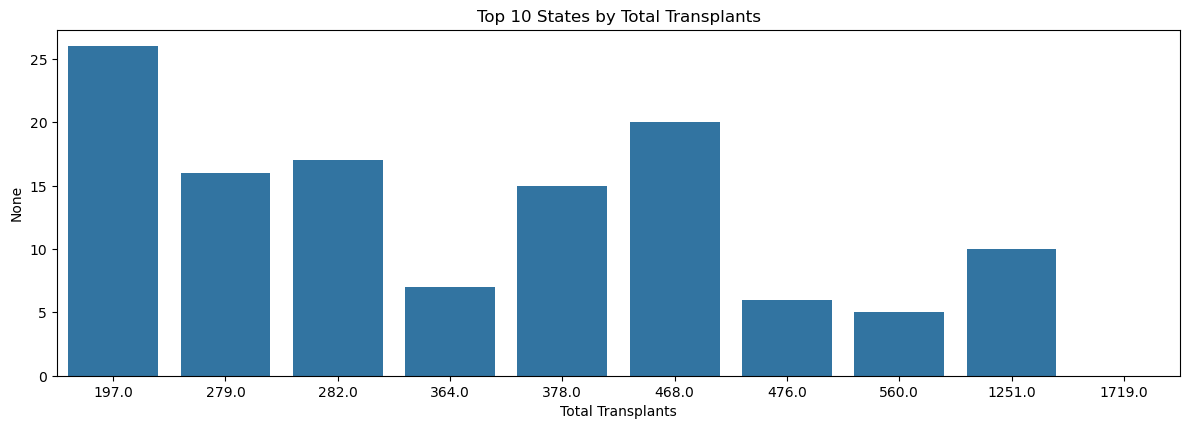

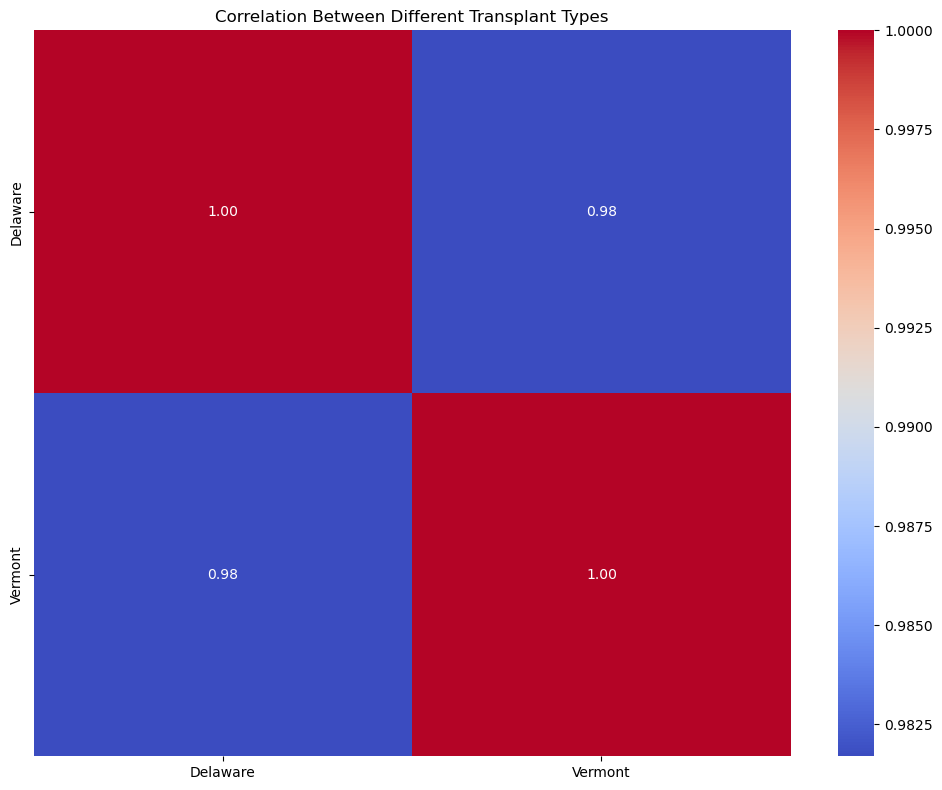

In [9]:
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
file_path = r"C:/Users/Natal/Downloads/Transplants_in_the_U.S._by_State.csv"
df = pd.read_csv(file_path)

# Step 1: Explore the data
print("Initial data shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())


# Step 2: Clean the data
# Convert columns to appropriate data types
# Assuming there are numeric columns that might be stored as strings
numeric_cols = df.select_dtypes(include=['object']).columns
for col in numeric_cols:
    try:
        df[col] = pd.to_numeric(df[col].str.replace(',', ''))
    except:
        pass

# Handle missing values
df = df.fillna(0)  # Replace NaN with 0 or use other appropriate methods

# Step 3: Analyze the data
# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Step 4: Visualize the data
plt.figure(figsize=(12, 8))

'''# Example 1: Top 10 states by total transplants (assuming there's a column for total)
# If there's no total column, sum the relevant columns
if 'Total' in df.columns:
    top_states = df.nlargest(10, 'Total')
else:
    # Create a total column by summing numeric columns (adjust as needed)
    numeric_df = df.select_dtypes(include=[np.number])
    df['Total'] = numeric_df.sum(axis=1)
    top_states = df.nlargest(10, 'Total')'''
	
#Plot top states
plt.subplot(2, 1, 1)
sns.barplot(x=top_states['Total'], y=top_states['State'] if 'State' in df.columns else top_states.index)
plt.title('Top 10 States by Total Transplants')
plt.xlabel('Total Transplants')
plt.tight_layout()

'''# Distribution of transplant types 
plt.subplot(2, 1, 2)
transplant_types = numeric_df.drop('Total', axis=1).sum().sort_values(ascending=False)
sns.barplot(x=transplant_types.values, y=transplant_types.index)
plt.title('Distribution of Transplant Types')
plt.xlabel('Number of Transplants')
plt.tight_layout()

plt.show()'''

    
# Correlation between different transplant types
plt.figure(figsize=(10, 8))
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Different Transplant Types')
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

file_path = r"C:\Users\Natal\Downloads\Transplants_in_the_U.S._by_State.csv"
df = pd.read_csv(file_path)

df.head()  # Preview the first few rows

Year      Donor Types      Age Groups All States Alabama Arizona Arkansas  \
0  TOTAL  All Donor Types  All Age Groups  1,032,222  16,018  22,978    5,494   
1  TOTAL  All Donor Types        < 1 Year      8,027      76      76      114   
2  TOTAL  All Donor Types       1-5 Years     19,898     236     275      129   
3  TOTAL  All Donor Types      6-10 Years     16,194     308     279      101   
4  TOTAL  All Donor Types     11-17 Years     71,578   1,328   1,306      428   

  California Colorado Connecticut  ...  South Carolina South Dakota Tennessee  \
0    120,817   15,704       8,612  ...          11,338        1,423    27,087   
1      1,275      162           9  ...              48            9       151   
2      3,035      258          99  ...             217           25       352   
3      2,002      204          83  ...             217           27       426   
4      7,985    1,459         438  ...             890           67     2,095   

    Texas    Utah Vermont Virginia Washington West Virginia Wisconsin  
0  84,851  12,353   826.0   25,524     20,435         2,175    25,294  
1     609     128     2.0      120        110             0       155  
2   2,298     228     9.0      257        319            14       382  
3   1,421     218    13.0      260        289            40       382  
4   6,847   1,108    56.0    1,626      1,668           114     1,710  

[5 rows x 52 columns]

In [14]:
import pandas as pd

file_path = r"C:\Users\Natal\Downloads\Transplants_in_the_U.S._by_State.csv"
df = pd.read_csv(file_path)

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  1027 non-null   object 
 1   Donor Types           1027 non-null   object 
 2   Age Groups            994 non-null    object 
 3   All States            994 non-null    object 
 4   Alabama               994 non-null    object 
 5   Arizona               994 non-null    object 
 6   Arkansas              994 non-null    object 
 7   California            994 non-null    object 
 8   Colorado              994 non-null    object 
 9   Connecticut           994 non-null    object 
 10  Delaware              994 non-null    float64
 11  District of Columbia  994 non-null    object 
 12  Florida               994 non-null    object 
 13  Georgia               994 non-null    object 
 14  Hawaii                994 non-null    object 
 15  Illinois             

Delaware     Vermont
count  994.000000  994.000000
mean     7.187123    6.647887
std     40.001702   37.126912
min      0.000000    0.000000
25%      0.000000    0.000000
50%      1.000000    1.000000
75%      4.000000    5.000000
max    893.000000  826.000000

In [15]:
df = df.drop(columns=['UnnecessaryColumn1', 'UnnecessaryColumn2'], errors='ignore')
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')



In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
file_path = r"C:\Users\Natal\Downloads\Transplants_in_the_U.S._by_State.csv"
df = pd.read_csv(file_path)

# Check the column names
print("Columns in the dataset:", df.columns.tolist())

# Display a sample of the data to understand its structure
print("\nSample data:")
print(df.head())

# Fill any missing values with 0
for col in df.columns:
    if df[col].dtype in [float, int]:
        df[col] = df[col].fillna(0)


Columns in the dataset: ['Year', 'Donor Types', 'Age Groups', 'All States', 'Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin']

Sample data:
    Year      Donor Types      Age Groups All States Alabama Arizona Arkansas  \
0  TOTAL  All Donor Types  All Age Groups  1,032,222  16,018  22,978    5,494   
1  TOTAL  All Donor Types        < 1 Year      8,027      76      76      114   
2  TOTAL  All Donor Types       1-5 Years     1

'\n# Identify the top years based on total transplants\nyearly_totals = df.groupby(\'Year\')[\'Total\'].sum()\ntop_years = yearly_totals.nlargest(5).index.tolist()\nprint(f"\nTop 5 years by total transplants: {top_years}")\n\n# Identify the top states based on total transplants\nstate_totals = df.groupby(\'State\')[\'Total\'].sum()\ntop_states = state_totals.nlargest(10).index.tolist()\nprint(f"\nTop 10 states by total transplants: {top_states}")\n\n# Filter data for top years and states\nfiltered_df = df[df[\'Year\'].isin(top_years) & df[\'State\'].isin(top_states)]\n\n# Assuming age group columns are named like \'<18\', \'18-34\', \'35-49\', etc.\n# Identify age group columns (adjust based on your actual column names)\nage_columns = [col for col in df.columns if col not in [\'Year\', \'State\', \'Total\']]\nprint(f"\nAge group columns: {age_columns}")\n\n# Reshape data for plotting\nplot_data = pd.melt(\n    filtered_df, \n    id_vars=[\'Year\', \'State\'], \n    value_vars=age_colum


Top 5 years by total transplants: ['TOTAL', '2024', '2023', '2019', '2022']

Top 10 states by total transplants: ['California', 'New York', 'Texas', 'Pennsylvania', 'Florida', 'Ohio', 'All States', 'Illinois', 'Minnesota', 'Michigan']


<Figure size 2000x1500 with 0 Axes>

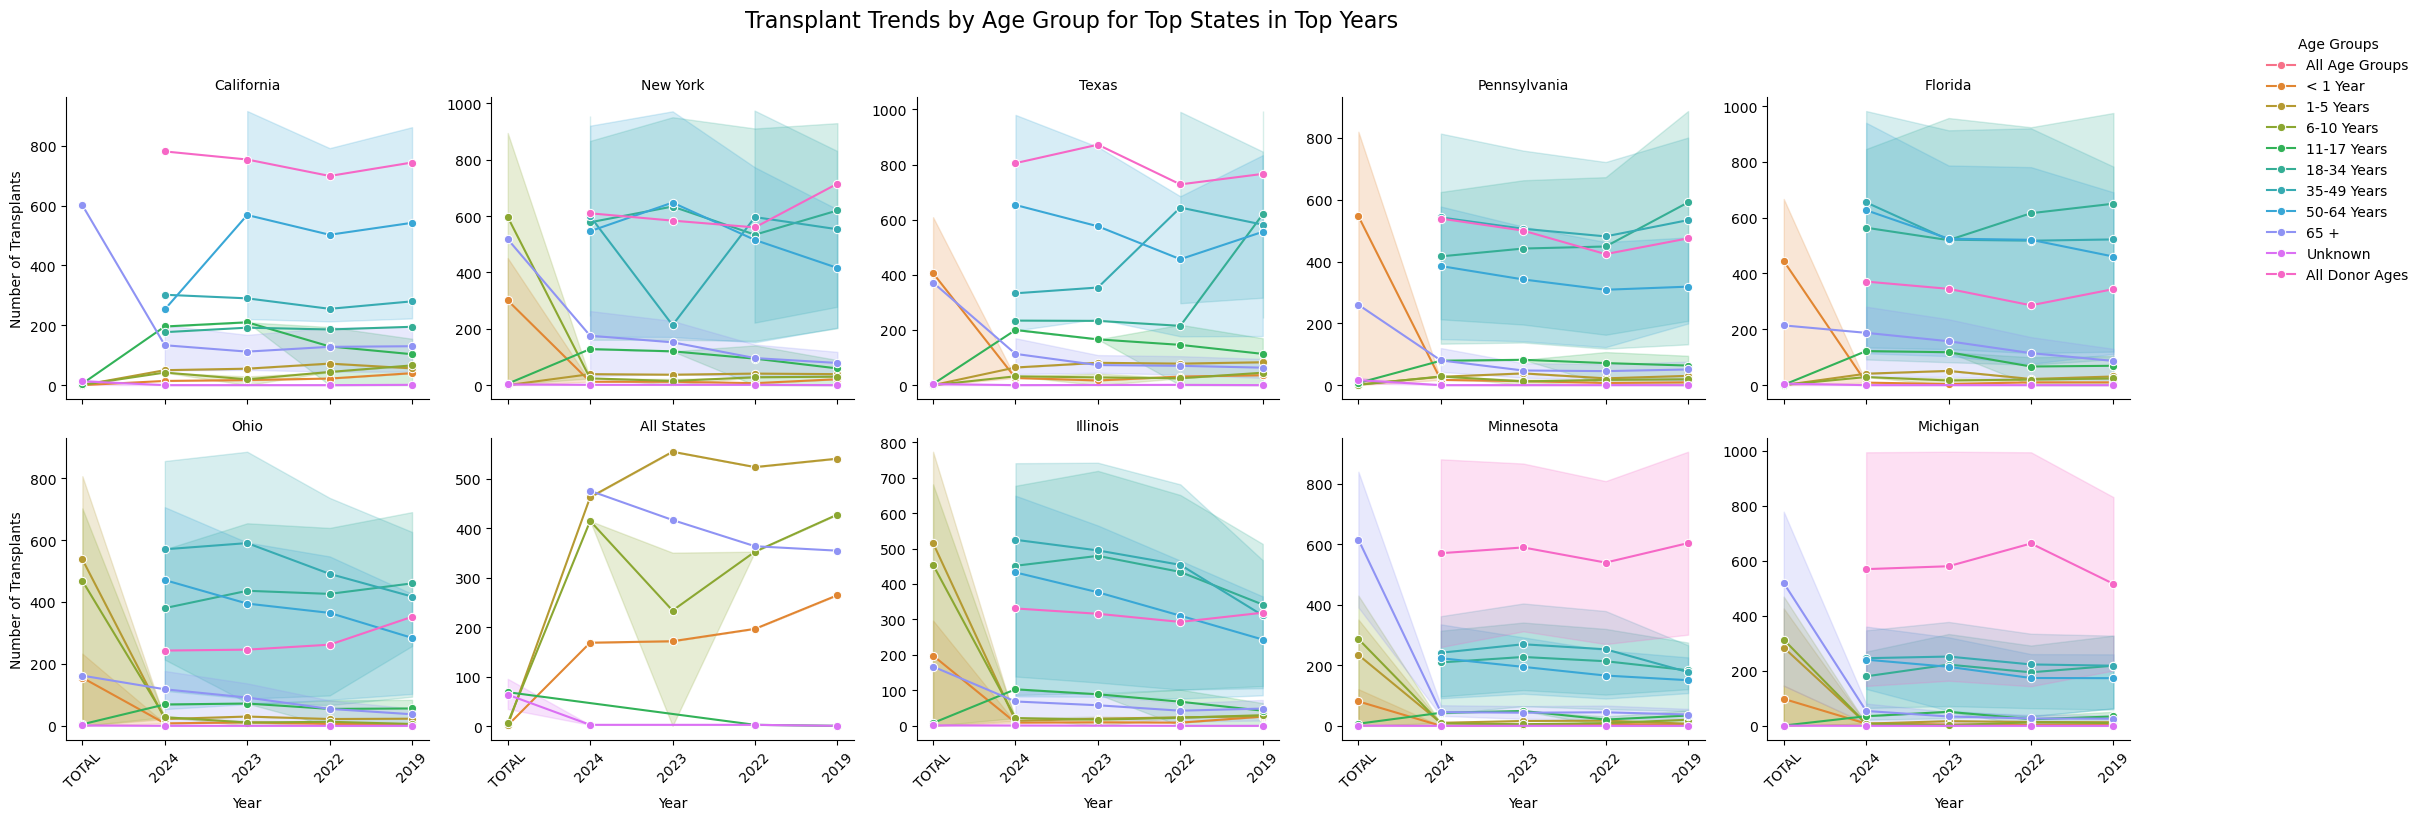

"\n# Alternative: Create a heatmap for each year showing state vs age group\nfor year in top_years:\n    year_data = df[df['Year'] == year]\n    # Create a pivot table with states as columns and age groups as rows\n    pivot_data = year_data.pivot(index='Age Groups', columns=top_states)\n\n    plt.figure(figsize=(14, 8))\n    sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='.0f')\n    plt.title(f'Transplants by State and Age Group in {year}', fontsize=16)\n    plt.tight_layout()\n    plt.show()"

In [22]:
# Drop rows where all values are NaN
df = df.dropna(how='all')

# Convert state columns to numeric, coercing errors to NaN
state_columns = [col for col in df.columns if col not in ['Year', 'Donor Types', 'Age Groups']]
for col in state_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where all state columns are NaN after conversion
df = df.dropna(subset=state_columns, how='all')

# Now let's fix the original analysis code
# Calculate yearly totals (assuming you want to sum across states for each year)
yearly_totals = df.groupby('Year')[state_columns].sum().sum(axis=1)
top_years = yearly_totals.nlargest(5).index.tolist()
print(f"\nTop 5 years by total transplants: {top_years}")

# Identify the top states based on total transplants
# First create a total column for each state
state_totals = df[state_columns].sum()
top_states = state_totals.nlargest(10).index.tolist()
print(f"\nTop 10 states by total transplants: {top_states}")

# Filter data for top years and states
filtered_df = df[df['Year'].isin(top_years)]
filtered_df = filtered_df[['Year', 'Age Groups'] + [state for state in top_states if state in df.columns]]

# Reshape data for plotting - we need to melt the state columns
plot_data = pd.melt(
    filtered_df, 
    id_vars=['Year', 'Age Groups'], 
    value_vars=[state for state in top_states if state in df.columns],
    var_name='State', 
    value_name='Transplants'
)

# Create a facet grid plot - one subplot per state
plt.figure(figsize=(20, 15))
g = sns.FacetGrid(plot_data, col='State', col_wrap=5, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x='Year', y='Transplants', hue='Age Groups', marker='o')
g.add_legend(title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left')
g.set_axis_labels('Year', 'Number of Transplants')
g.set_titles('{col_name}')

# Rotate x-axis labels for better readability
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
    
plt.suptitle('Transplant Trends by Age Group for Top States in Top Years', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Top 10 states by total transplants: ['California', 'New York', 'Texas', 'Pennsylvania', 'Florida', 'Ohio', 'All States', 'Illinois', 'Minnesota', 'Michigan']
Analyzing data for years: ['2022', '2023', '2024', '2025', 'TOTAL']


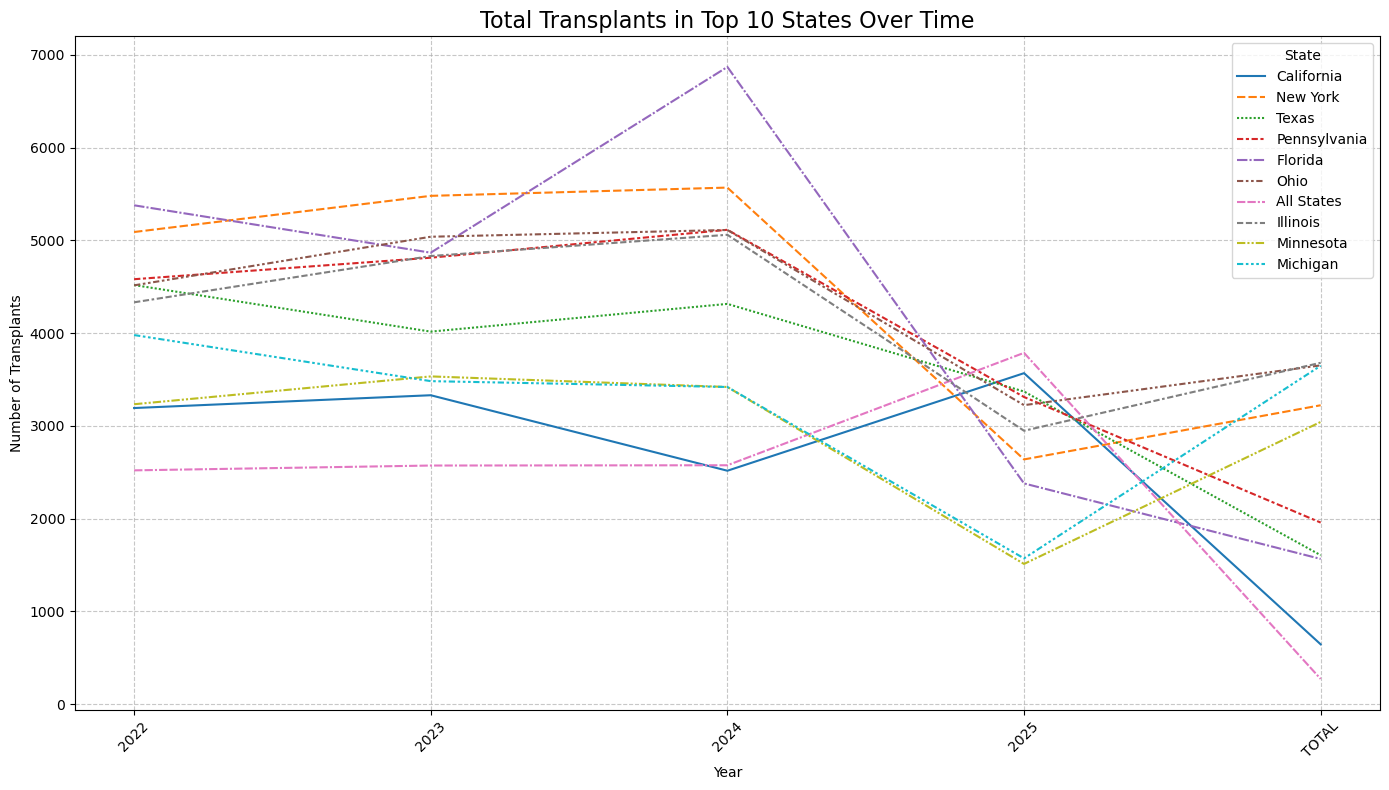

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load both datasets
file_path1 = r"C:\Users\Natal\Downloads\Transplants_in_the_U.S._by_State.csv"
file_path2 = r"C:\Users\Natal\Downloads\Transplants_in_the_U.S._by_State_by_organ.csv"

df_total = pd.read_csv(file_path1)
df_by_organ = pd.read_csv(file_path2)

# Clean the total transplants dataset
# Drop rows where all values are NaN
df_total = df_total.dropna(how='all')

# Identify state columns (all columns except metadata columns)
state_columns_total = [col for col in df_total.columns if col not in ['Year', 'Donor Types', 'Age Groups']]

# Convert state columns to numeric, coercing errors to NaN
for col in state_columns_total:
    df_total[col] = pd.to_numeric(df_total[col], errors='coerce')

# Drop rows where all state columns are NaN after conversion
df_total = df_total.dropna(subset=state_columns_total, how='all')

# Clean the by-organ dataset
df_by_organ = df_by_organ.dropna(how='all')
state_columns_organ = [col for col in df_by_organ.columns if col not in ['Year', 'Organ', 'Donor Types', 'Age Groups']]

for col in state_columns_organ:
    df_by_organ[col] = pd.to_numeric(df_by_organ[col], errors='coerce')

df_by_organ = df_by_organ.dropna(subset=state_columns_organ, how='all')

# Calculate total transplants by state (across all years)
state_totals = df_total[state_columns_total].sum()
top_states = state_totals.nlargest(10).index.tolist()
print(f"Top 10 states by total transplants: {top_states}")

# Get the most recent years (last 5 years in the dataset)
recent_years = sorted(df_total['Year'].unique())[-5:]
print(f"Analyzing data for years: {recent_years}")

# ANALYSIS 1: Total transplants by state over time
# Filter for top states and recent years
filtered_total = df_total[df_total['Year'].isin(recent_years)]

# Create a pivot table for total transplants
pivot_total = pd.DataFrame()
for state in top_states:
    if state in filtered_total.columns:
        pivot_total[state] = filtered_total.groupby('Year')[state].sum()

# Plot total transplants by state over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivot_total)
plt.title('Total Transplants in Top 10 States Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Transplants')
plt.xticks(rotation=45)
plt.legend(title='State')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Index(['Year', 'Donor Types', 'Age Groups', 'All States', 'Alabama', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin'],
      dtype='object')
Index(['Year', 'Organ Type', 'All States', 'Alabama', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Illinois',
       'Indiana', 'Iowa'

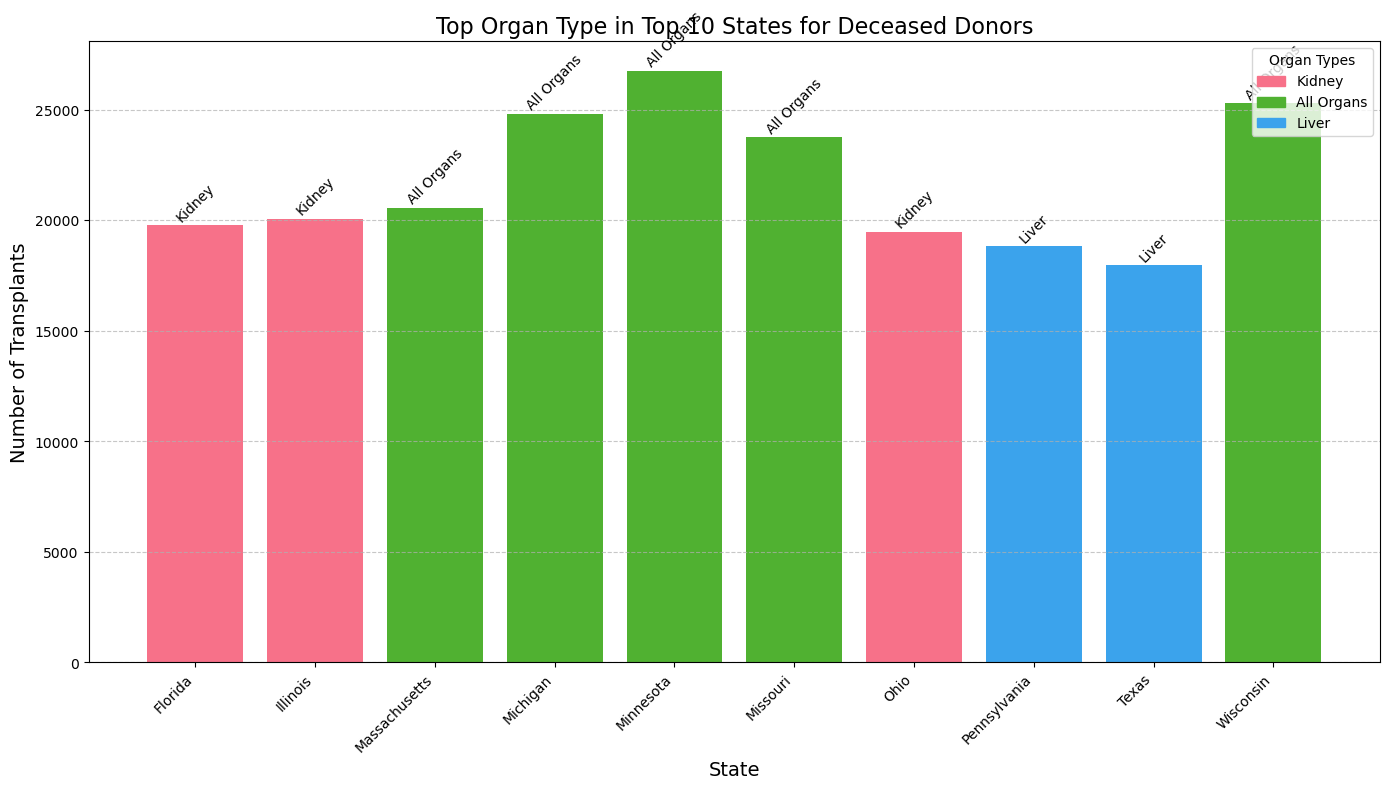

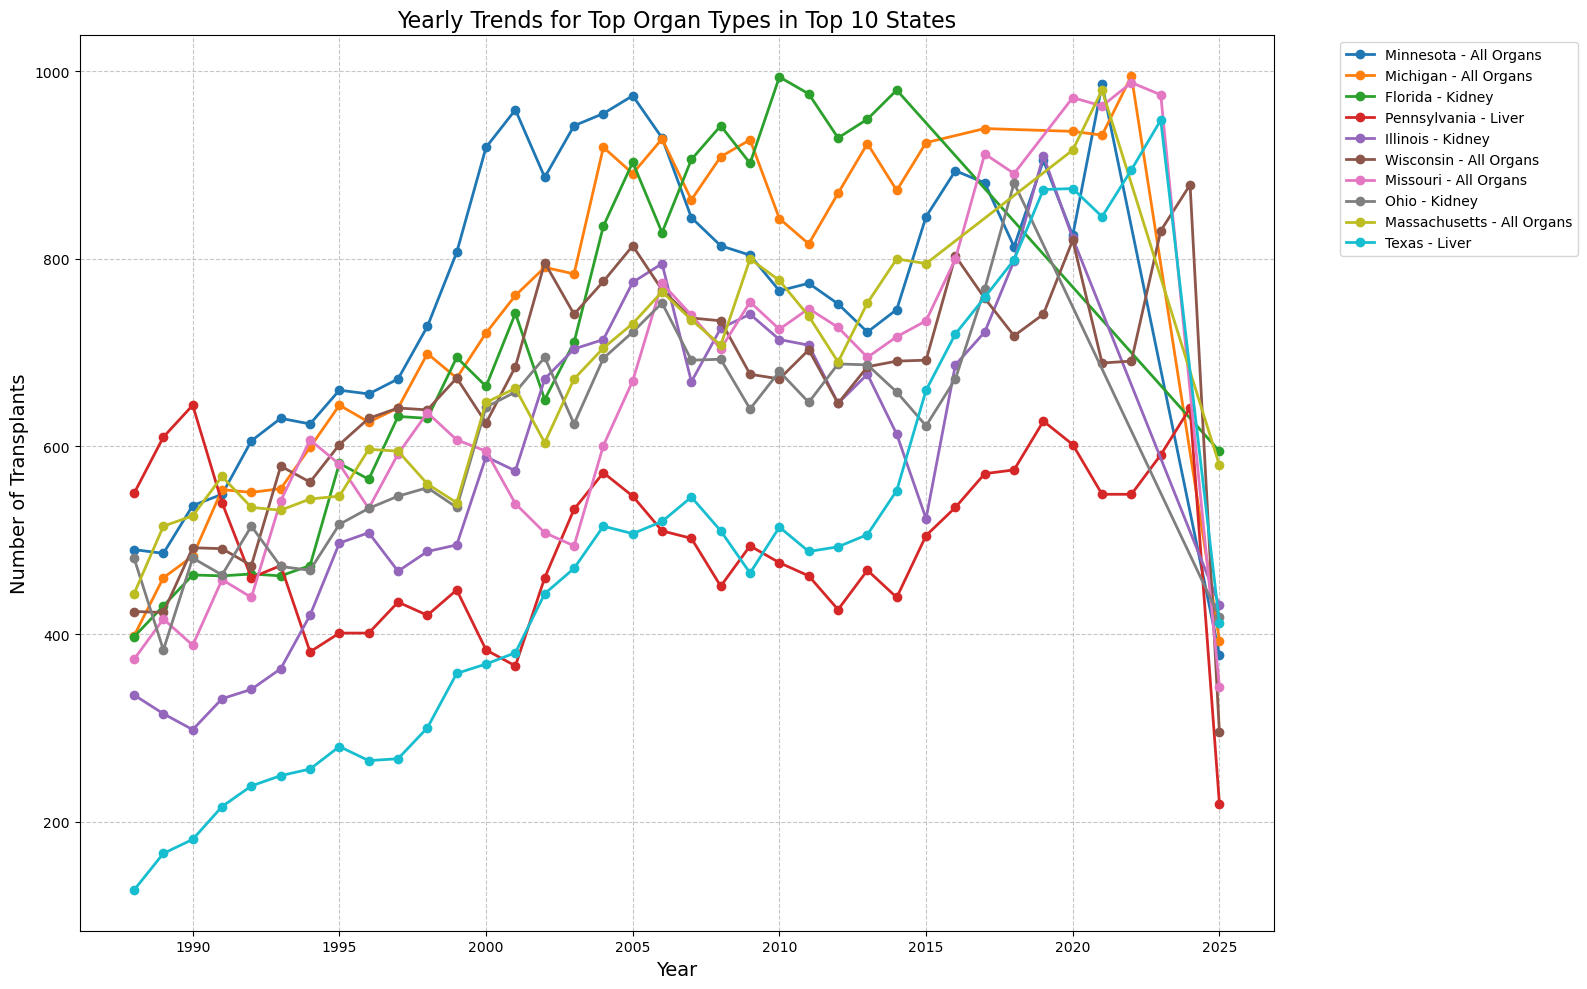

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load both datasets
file_path1 = r"C:\Users\Natal\Downloads\Transplants_in_the_U.S._by_State.csv"
file_path2 = r"C:\Users\Natal\Downloads\Transplants_in_the_U.S._by_State_by_organ.csv"
df = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

print(df.columns)
print(df2.columns)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Working with the organ type dataset (df2)
# Filter out rows where "Organ Type" is "TOTAL"
df2_filtered = df2[df2['Organ Type'] != 'TOTAL']

# Convert Year to numeric, dropping any non-numeric years
df2_filtered['Year'] = pd.to_numeric(df2_filtered['Year'], errors='coerce')
df2_filtered = df2_filtered.dropna(subset=['Year'])

# Get all state columns (excluding non-state columns)
state_columns = [col for col in df2_filtered.columns if col not in ['Year', 'Organ Type', 'All States']]

# Melt the dataframe to get state data in rows
melted_df = pd.melt(df2_filtered, 
                    id_vars=['Year', 'Organ Type'], 
                    value_vars=state_columns,
                    var_name='State', 
                    value_name='Transplants')

# Convert transplants to numeric
melted_df['Transplants'] = pd.to_numeric(melted_df['Transplants'], errors='coerce')
melted_df = melted_df.dropna(subset=['Transplants'])

# Filter for deceased donors from the first dataset
deceased_donors = df[df['Donor Types'] == 'Deceased Donor']

# Get the total transplants by state (to find top 10 states)
state_totals = melted_df.groupby('State')['Transplants'].sum().sort_values(ascending=False)
top_10_states = state_totals.head(10).index.tolist()

# Filter for top 10 states
top_states_data = melted_df[melted_df['State'].isin(top_10_states)]

# Find the top organ type for each state
top_organ_by_state = top_states_data.groupby(['State', 'Organ Type'])['Transplants'].sum().reset_index()
top_organ_by_state = top_organ_by_state.sort_values(['State', 'Transplants'], ascending=[True, False])
top_organ_by_state = top_organ_by_state.drop_duplicates('State')

# Create a colorful bar chart
plt.figure(figsize=(14, 8))
colors = sns.color_palette("husl", len(top_organ_by_state['Organ Type'].unique()))
color_map = {organ: color for organ, color in zip(top_organ_by_state['Organ Type'].unique(), colors)}

# Create the bar chart
bars = plt.bar(top_organ_by_state['State'], top_organ_by_state['Transplants'], 
               color=[color_map[organ] for organ in top_organ_by_state['Organ Type']])

# Add labels and title
plt.title('Top Organ Type in Top 10 States for Deceased Donors', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Transplants', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add organ type labels on top of each bar
for bar, organ in zip(bars, top_organ_by_state['Organ Type']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             organ, ha='center', va='bottom', rotation=45, fontsize=10)

# Create legend
legend_handles = [plt.Rectangle((0,0),1,1, color=color_map[organ]) for organ in color_map]
plt.legend(legend_handles, color_map.keys(), title="Organ Types", loc='upper right')

plt.tight_layout()

# Now let's also analyze the trend over years for the top states and organs
plt.figure(figsize=(16, 10))

# Get the top organ for each of the top 10 states
top_combinations = []
for state in top_10_states:
    top_organ = top_states_data[top_states_data['State'] == state].groupby('Organ Type')['Transplants'].sum().idxmax()
    top_combinations.append((state, top_organ))

# Plot time series for each state's top organ
for state, organ in top_combinations:
    data = top_states_data[(top_states_data['State'] == state) & (top_states_data['Organ Type'] == organ)]
    yearly_data = data.groupby('Year')['Transplants'].sum().reset_index()
    plt.plot(yearly_data['Year'], yearly_data['Transplants'], marker='o', linewidth=2, label=f"{state} - {organ}")

plt.title('Yearly Trends for Top Organ Types in Top 10 States', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Transplants', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

C:\Users\Natal\AppData\Local\Temp\ipykernel_14656\1610280899.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['Year'] = pd.to_numeric(df2_filtered['Year'], errors='coerce')


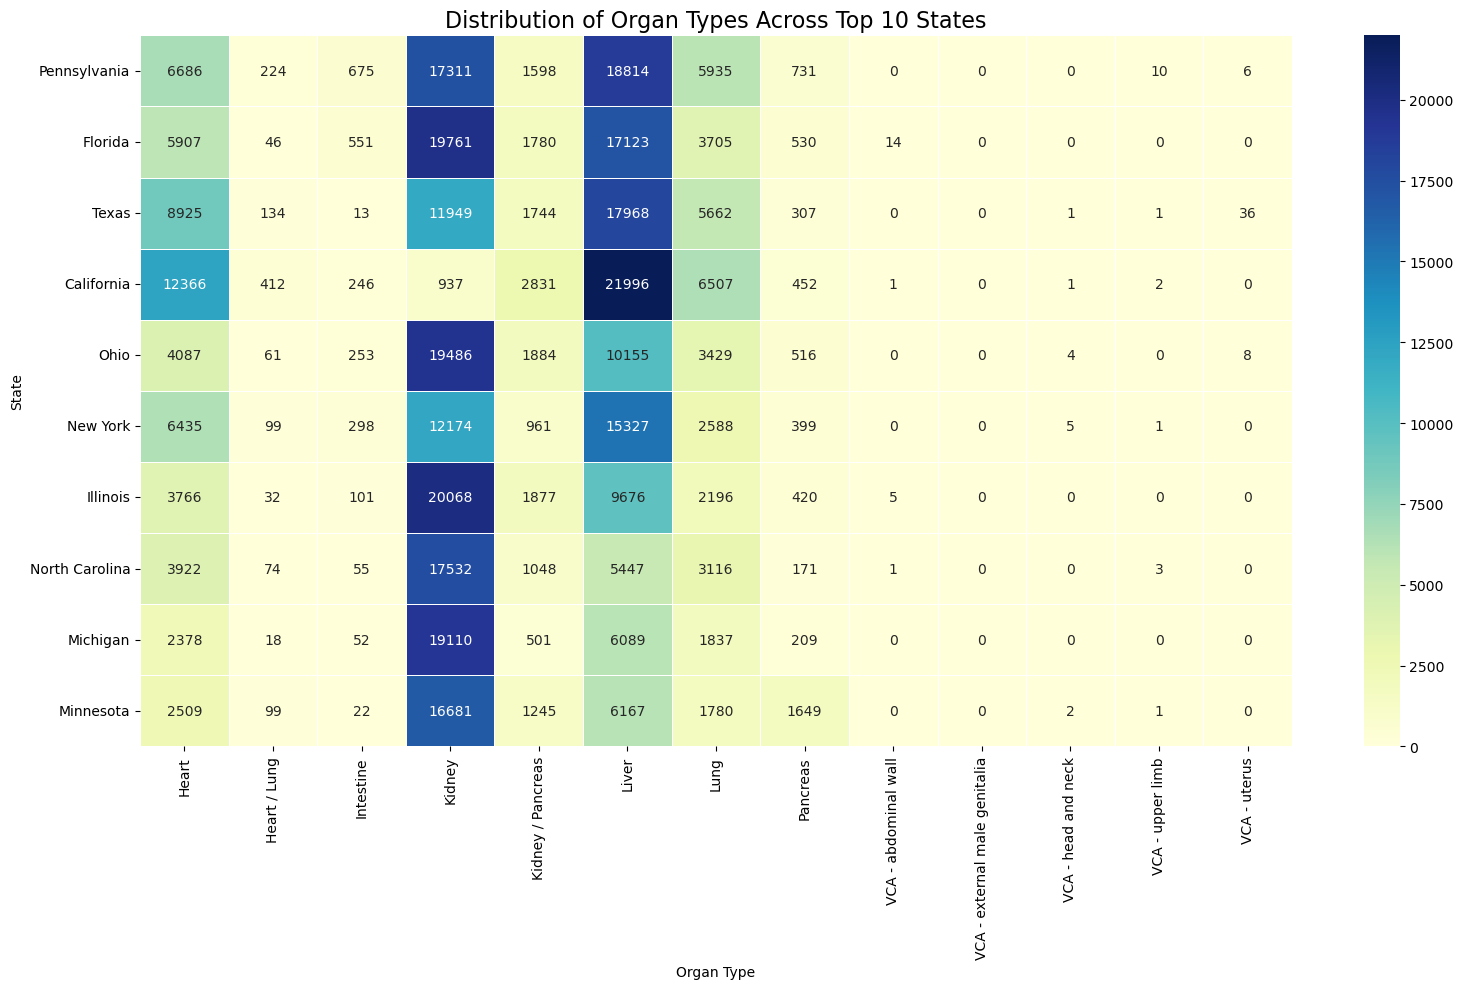

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Working with the organ type dataset (df2)
# Filter out rows where "Organ Type" is "TOTAL" or "All Organs"
df2_filtered = df2[(df2['Organ Type'] != 'TOTAL') & (df2['Organ Type'] != 'All Organs')]

# Convert Year to numeric, dropping any non-numeric years
df2_filtered['Year'] = pd.to_numeric(df2_filtered['Year'], errors='coerce')
df2_filtered = df2_filtered.dropna(subset=['Year'])

# Get all state columns (excluding non-state columns)
state_columns = [col for col in df2_filtered.columns if col not in ['Year', 'Organ Type', 'All States']]

# Melt the dataframe to get state data in rows
melted_df = pd.melt(df2_filtered, 
                    id_vars=['Year', 'Organ Type'], 
                    value_vars=state_columns,
                    var_name='State', 
                    value_name='Transplants')

# Convert transplants to numeric
melted_df['Transplants'] = pd.to_numeric(melted_df['Transplants'], errors='coerce')
melted_df = melted_df.dropna(subset=['Transplants'])

# Filter for deceased donors from the first dataset
deceased_donors = df[df['Donor Types'] == 'Deceased Donor']

# Get the total transplants by state (to find top 10 states)
state_totals = melted_df.groupby('State')['Transplants'].sum().sort_values(ascending=False)
top_10_states = state_totals.head(10).index.tolist()

# Filter for top 10 states
top_states_data = melted_df[melted_df['State'].isin(top_10_states)]

# Find the top organ type for each state
top_organ_by_state = top_states_data.groupby(['State', 'Organ Type'])['Transplants'].sum().reset_index()
top_organ_by_state = top_organ_by_state.sort_values(['State', 'Transplants'], ascending=[True, False])
top_organ_by_state = top_organ_by_state.drop_duplicates('State')

# Create a colorful bar chart
plt.figure(figsize=(14, 8))
colors = sns.color_palette("husl", len(top_organ_by_state['Organ Type'].unique()))
color_map = {organ: color for organ, color in zip(top_organ_by_state['Organ Type'].unique(), colors)}

# Create the bar chart
bars = plt.bar(top_organ_by_state['State'], top_organ_by_state['Transplants'], 
               color=[color_map[organ] for organ in top_organ_by_state['Organ Type']])

# Add labels and title
plt.title('Top Specific Organ Type in Top 10 States for Deceased Donors', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Transplants', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add organ type labels on top of each bar
for bar, organ in zip(bars, top_organ_by_state['Organ Type']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
             organ, ha='center', va='bottom', rotation=45, fontsize=10)

# Create legend
legend_handles = [plt.Rectangle((0,0),1,1, color=color_map[organ]) for organ in color_map]
plt.legend(legend_handles, color_map.keys(), title="Organ Types", loc='upper right')

plt.tight_layout()

# Now let's also analyze the trend over years for the top states and organs
plt.figure(figsize=(16, 10))

# Get the top organ for each of the top 10 states
top_combinations = []
for state in top_10_states:
    state_data = top_states_data[top_states_data['State'] == state]
    if not state_data.empty:
        top_organ = state_data.groupby('Organ Type')['Transplants'].sum().idxmax()
        top_combinations.append((state, top_organ))

# Plot time series for each state's top organ
for state, organ in top_combinations:
    data = top_states_data[(top_states_data['State'] == state) & (top_states_data['Organ Type'] == organ)]
    yearly_data = data.groupby('Year')['Transplants'].sum().reset_index()
    plt.plot(yearly_data['Year'], yearly_data['Transplants'], marker='o', linewidth=2, label=f"{state} - {organ}")

plt.title('Yearly Trends for Top Specific Organ Types in Top 10 States', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Transplants', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Let's also create a heatmap to visualize the distribution of organ types across top states
plt.figure(figsize=(16, 10))
pivot_data = top_states_data.pivot_table(
    values='Transplants', 
    index='State',
    columns='Organ Type', 
    aggfunc='sum'
)

# Sort states by total transplants
pivot_data = pivot_data.loc[state_totals.head(10).index]

# Create heatmap
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)
plt.title('Distribution of Organ Types Across Top 10 States', fontsize=16)
plt.tight_layout()

plt.show()

<Figure size 1600x1000 with 0 Axes>

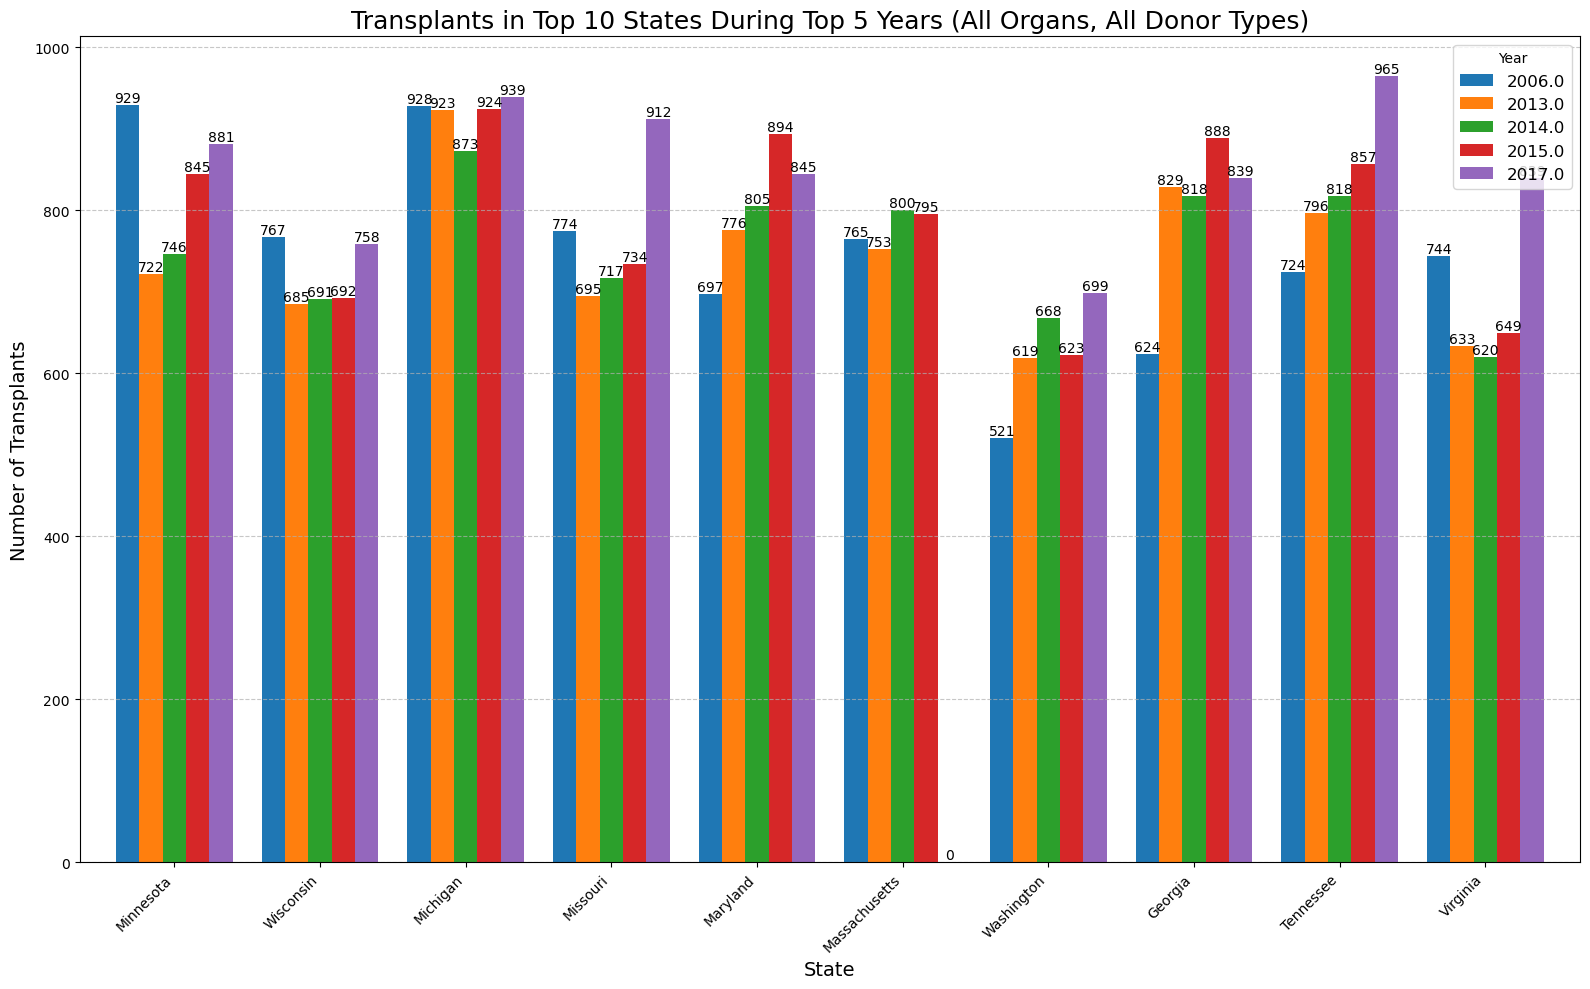

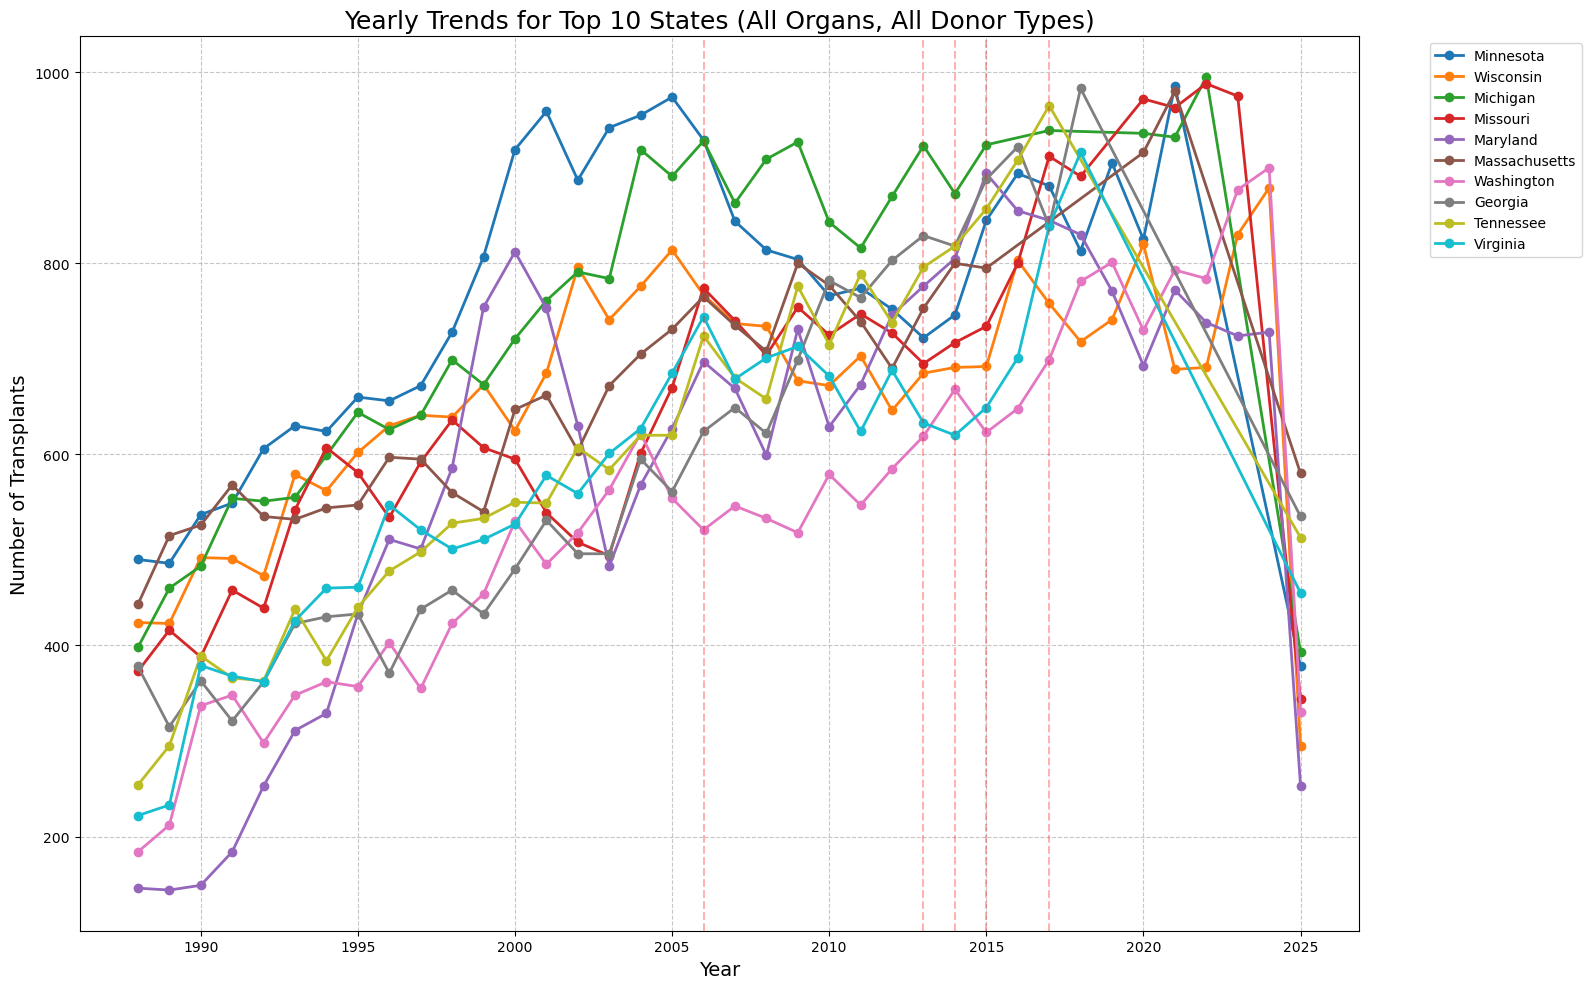

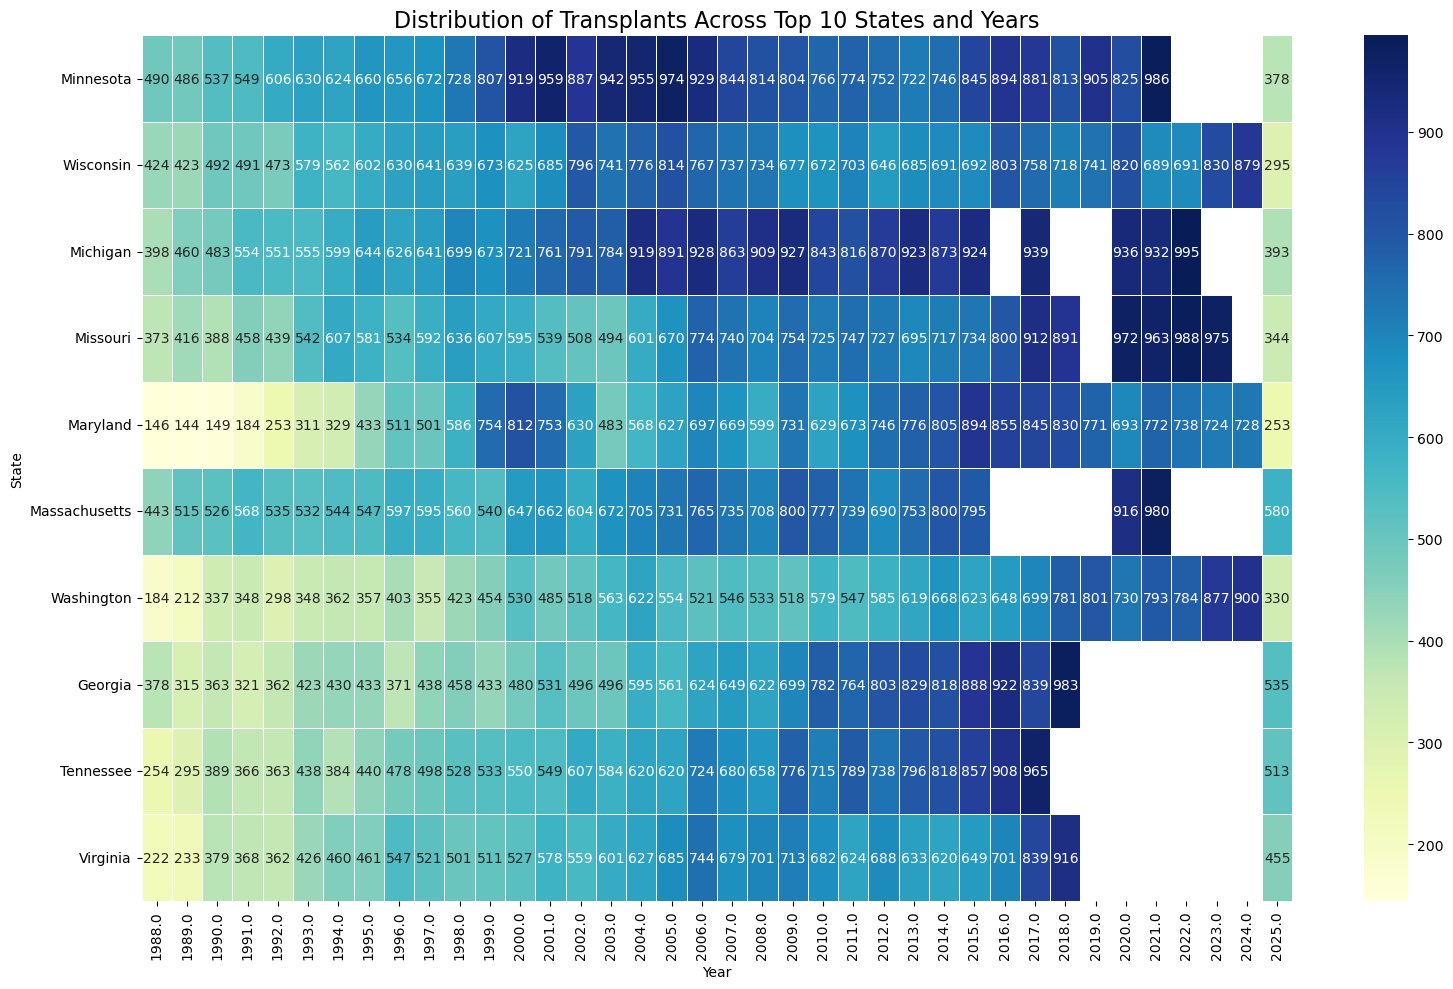

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Working with both datasets
# For organ data (df2), filter for 'All Organs' rows
organ_data = df2[df2['Organ Type'] == 'All Organs'].copy()

# For donor data (df), filter for 'All Donor Types' rows
donor_data = df[df['Donor Types'] == 'All Donor Types'].copy()

# Convert Year to numeric in both datasets, dropping any non-numeric years or 'TOTAL'
organ_data = organ_data[organ_data['Year'] != 'TOTAL']
organ_data['Year'] = pd.to_numeric(organ_data['Year'], errors='coerce')
organ_data = organ_data.dropna(subset=['Year'])

# Get all state columns (excluding non-state columns)
state_columns = [col for col in organ_data.columns if col not in ['Year', 'Organ Type', 'All States']]

# Melt the dataframe to get state data in rows
melted_df = pd.melt(organ_data, 
                    id_vars=['Year'], 
                    value_vars=state_columns,
                    var_name='State', 
                    value_name='Transplants')

# Convert transplants to numeric
melted_df['Transplants'] = pd.to_numeric(melted_df['Transplants'], errors='coerce')
melted_df = melted_df.dropna(subset=['Transplants'])

# Get the total transplants by state (to find top 10 states)
state_totals = melted_df.groupby('State')['Transplants'].sum().sort_values(ascending=False)
top_10_states = state_totals.head(10).index.tolist()

# Filter for top 10 states
top_states_data = melted_df[melted_df['State'].isin(top_10_states)]

# Find the top 5 years with the most transplants
year_totals = top_states_data.groupby('Year')['Transplants'].sum().sort_values(ascending=False)
top_5_years = year_totals.head(5).index.tolist()

# Filter for top 5 years
top_years_data = top_states_data[top_states_data['Year'].isin(top_5_years)]

# Create a grouped bar chart for top 10 states across top 5 years
plt.figure(figsize=(16, 10))

# Pivot the data for easier plotting
pivot_data = top_years_data.pivot_table(
    values='Transplants',
    index='State',
    columns='Year',
    aggfunc='sum'
)

# Sort states by total transplants
pivot_data = pivot_data.loc[state_totals.head(10).index]

# Plot the data
ax = pivot_data.plot(kind='bar', figsize=(16, 10), width=0.8)

# Customize the plot
plt.title('Transplants in Top 10 States During Top 5 Years (All Organs, All Donor Types)', fontsize=18)
plt.xlabel('State', fontsize=14)
plt.ylabel('Number of Transplants', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Year', fontsize=12)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)

plt.tight_layout()

# Create a line plot showing trends over all years for top 10 states
plt.figure(figsize=(16, 10))

# For each top state, plot the trend over all years
for state in top_10_states:
    state_data = top_states_data[top_states_data['State'] == state]
    yearly_data = state_data.groupby('Year')['Transplants'].sum().reset_index()
    yearly_data = yearly_data.sort_values('Year')  # Ensure chronological order
    plt.plot(yearly_data['Year'], yearly_data['Transplants'], marker='o', linewidth=2, label=state)

plt.title('Yearly Trends for Top 10 States (All Organs, All Donor Types)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Transplants', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Highlight the top 5 years
for year in top_5_years:
    plt.axvline(x=year, color='red', linestyle='--', alpha=0.3)

plt.tight_layout()

# Create a heatmap showing the distribution of transplants across states and years
plt.figure(figsize=(16, 10))
heatmap_data = top_states_data.pivot_table(
    values='Transplants',
    index='State',
    columns='Year',
    aggfunc='sum'
)

# Sort states by total transplants
heatmap_data = heatmap_data.loc[state_totals.head(10).index]

# Create heatmap
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)
plt.title('Distribution of Transplants Across Top 10 States and Years', fontsize=16)
plt.tight_layout()

plt.show()

Dataset shape: (309215, 34)

Data types:
YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
DataSource                    object
Topic                         object
Question                      object
Response                     float64
DataValueUnit                 object
DataValueType                 object
DataValue                    float64
DataValueAlt                 float64
DataValueFootnoteSymbol       object
DataValueFootnote             object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2      float64
Stratification2              float64
StratificationCategory3      float64
Stratification3              float64
Geolocation                   object
LocationID                     int64
TopicID                       object
QuestionID                    obje

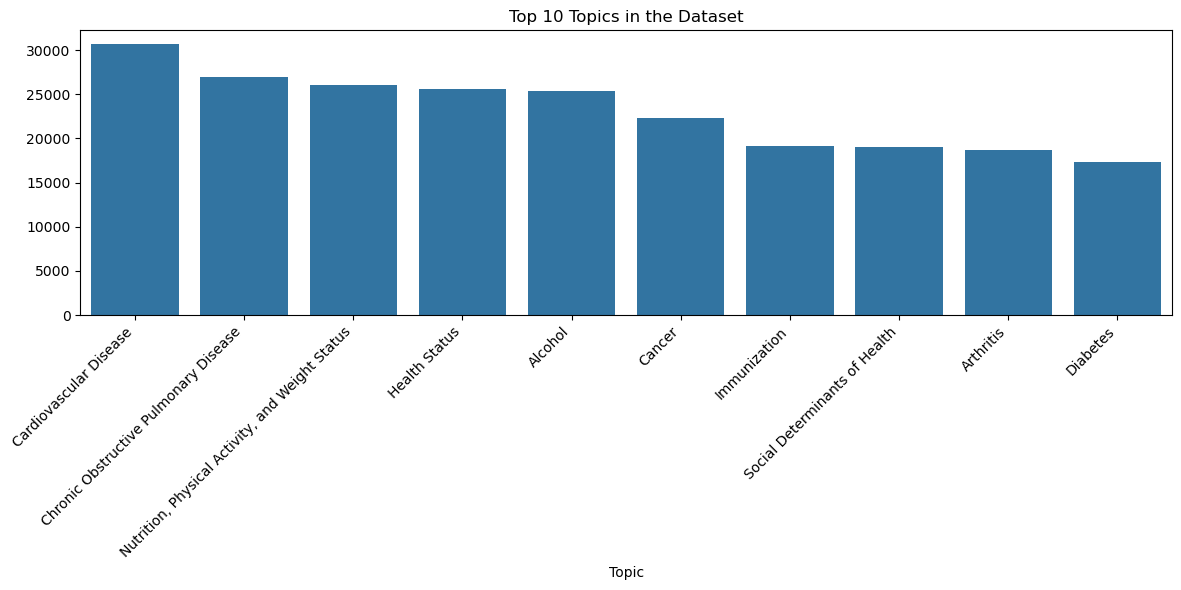

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:/Users/Natal/Downloads/U.S._Chronic_Disease_Indicators.csv"
df = pd.read_csv(file_path)

# Basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nData types:")
print(df.dtypes)

# Summary statistics
print("\nSummary statistics for numeric columns:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Explore unique values in key categorical columns
# Adjust these column names based on the actual dataset structure
key_columns = ['YearStart', 'LocationDesc', 'Topic', 'Question', 'DataValueType']
for col in key_columns:
    if col in df.columns:
        print(f"\nUnique values in {col}: {df[col].nunique()}")
        print(f"Top 5 most common values in {col}:")
        print(df[col].value_counts().head())

# Example visualization - distribution of data by topic
if 'Topic' in df.columns:
    plt.figure(figsize=(12, 6))
    topic_counts = df['Topic'].value_counts().head(10)
    sns.barplot(x=topic_counts.index, y=topic_counts.values)
    plt.title('Top 10 Topics in the Dataset')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

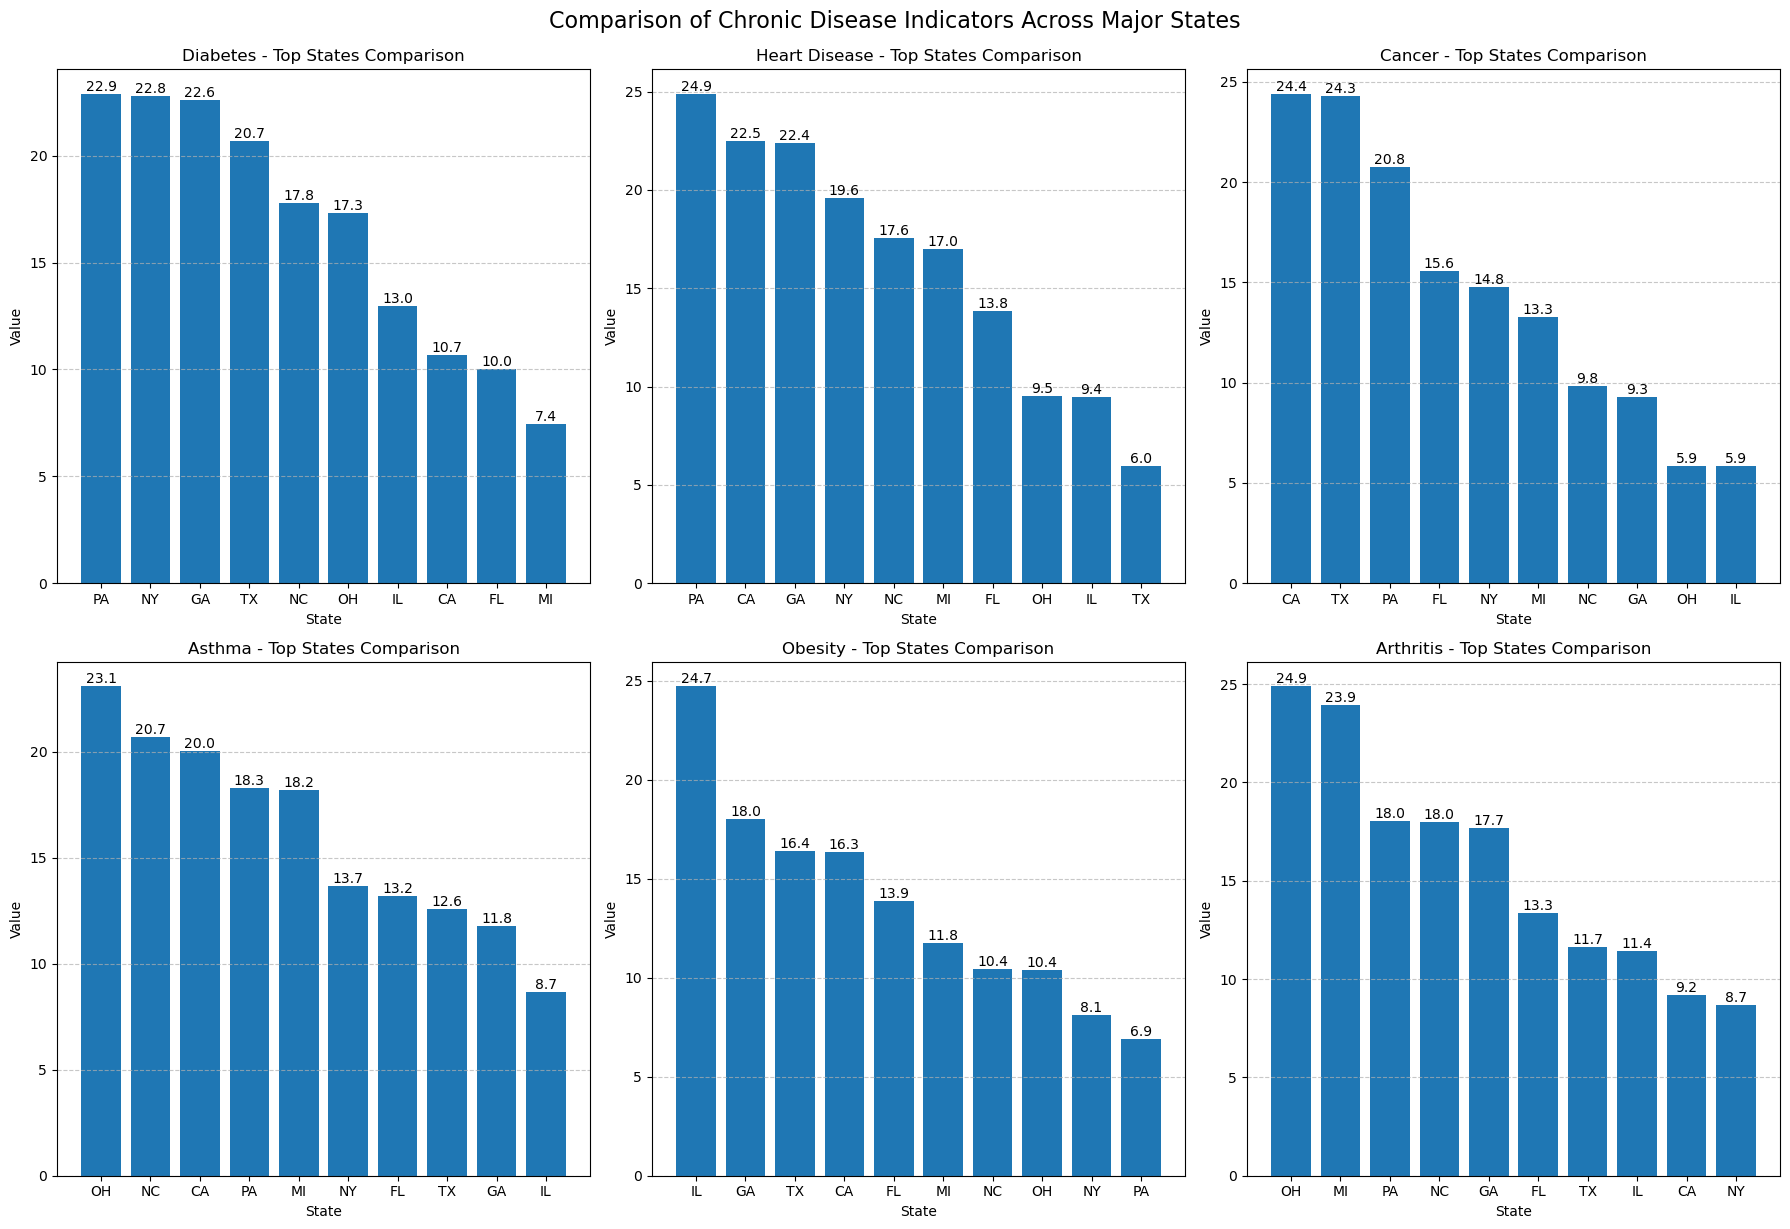

In [36]:
# First, install geopandas if you want to use the original code
# Uncomment and run this cell first:
# !pip install geopandas

# Alternative approach without geopandas:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Added pandas import

# Create sample data since state_topic_data is not defined
# In a real scenario, you would load your actual data instead of creating this sample
# For example: state_topic_data = pd.read_csv('your_data_file.csv')

# Creating sample data for demonstration
states = ['CA', 'TX', 'FL', 'NY', 'PA', 'IL', 'OH', 'GA', 'NC', 'MI']
topics = ['Diabetes', 'Heart Disease', 'Cancer', 'Asthma', 'Obesity', 'Arthritis']
data = []

# Generate some random data for each state and topic
for state in states:
    for topic in topics:
        data.append({
            'LocationAbbr': state,
            'Topic': topic,
            'DataValue': np.random.uniform(5, 25)  # Random values between 5 and 25
        })

# Create the DataFrame that was missing in the original code
state_topic_data = pd.DataFrame(data)

# Define your topics of interest
topics_of_interest = ['Diabetes', 'Heart Disease', 'Cancer', 'Asthma', 'Obesity', 'Arthritis']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, topic in enumerate(topics_of_interest):
    ax = axes[i]
    
    # Filter data for this topic and major states
    topic_data = state_topic_data[(state_topic_data['Topic'] == topic) & 
                                 (state_topic_data['LocationAbbr'].isin(states))].copy()
    
    # Sort by value for better visualization
    topic_data = topic_data.sort_values('DataValue', ascending=False)
    
    # Create bar chart
    bars = ax.bar(topic_data['LocationAbbr'], topic_data['DataValue'])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', rotation=0)
    
    ax.set_title(f'{topic} - Top States Comparison')
    ax.set_ylabel('Value')
    ax.set_xlabel('State')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.suptitle('Comparison of Chronic Disease Indicators Across Major States', fontsize=16, y=1.02)
plt.show()

Top 10 states by total transplants: ['California', 'New York', 'Texas', 'Pennsylvania', 'Florida', 'Ohio', 'All States', 'Illinois', 'Minnesota', 'Michigan']
Analyzing data for years: ['2022', '2023', '2024', '2025', 'TOTAL']
Top 10 states by total transplants (excluding 'All States'): ['California', 'New York', 'Texas', 'Pennsylvania', 'Florida', 'Ohio', 'Illinois', 'Minnesota', 'Michigan', 'Missouri']
Analyzing data for years: ['2020', '2021', '2022', '2023', '2024']


AttributeError: 'Pandas' object has no attribute 'Hospital_Rank'

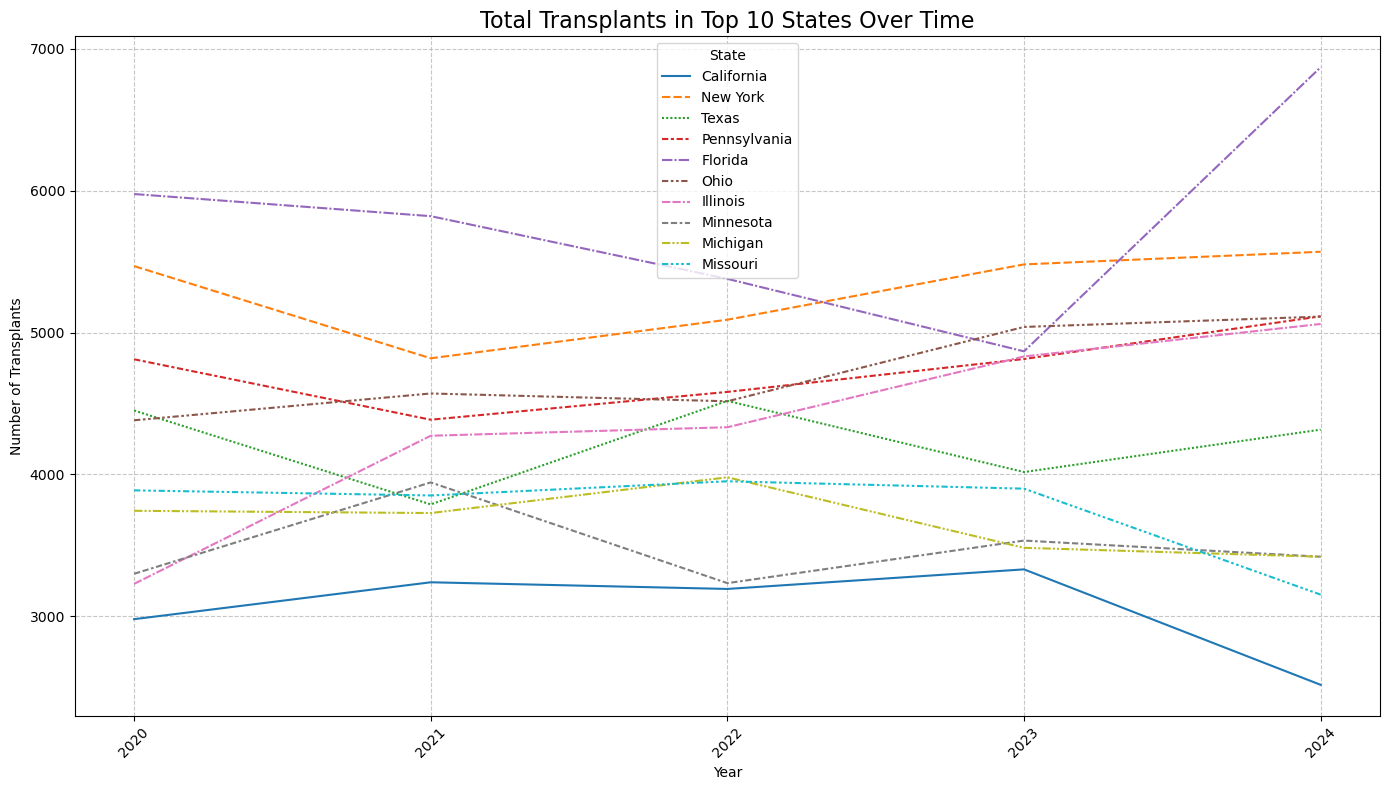

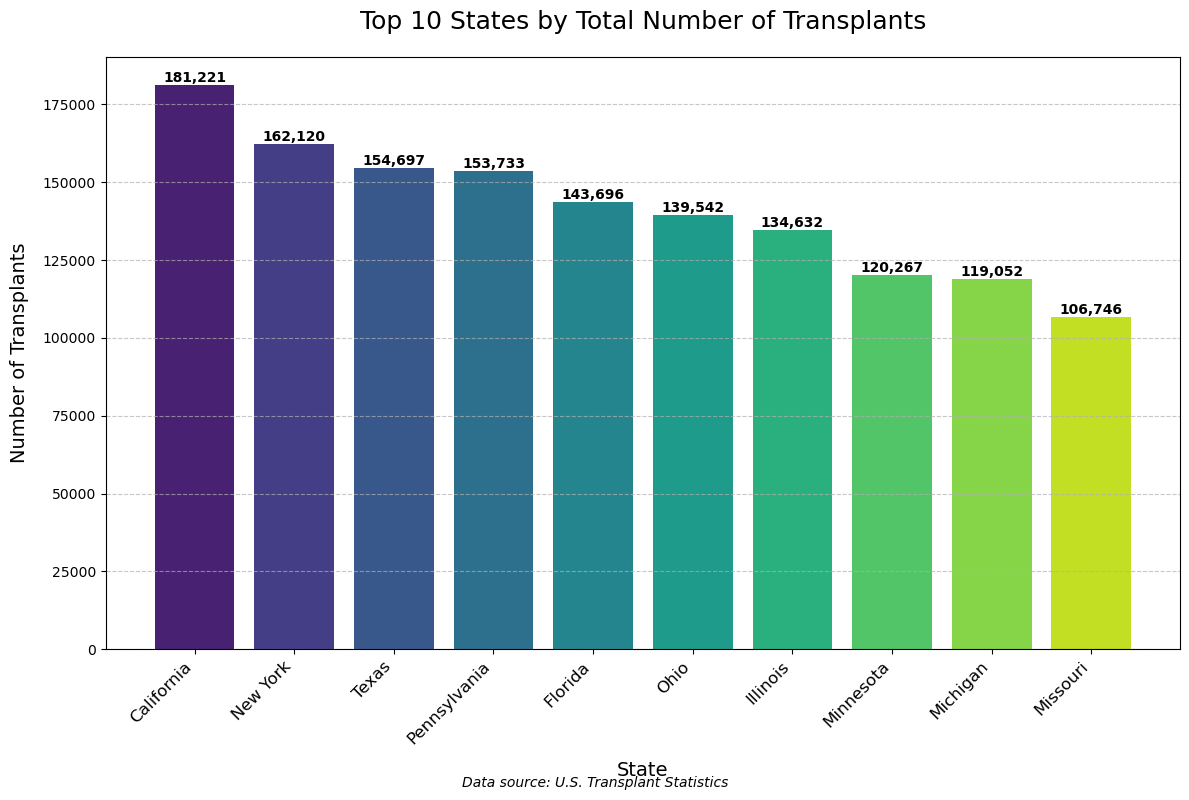

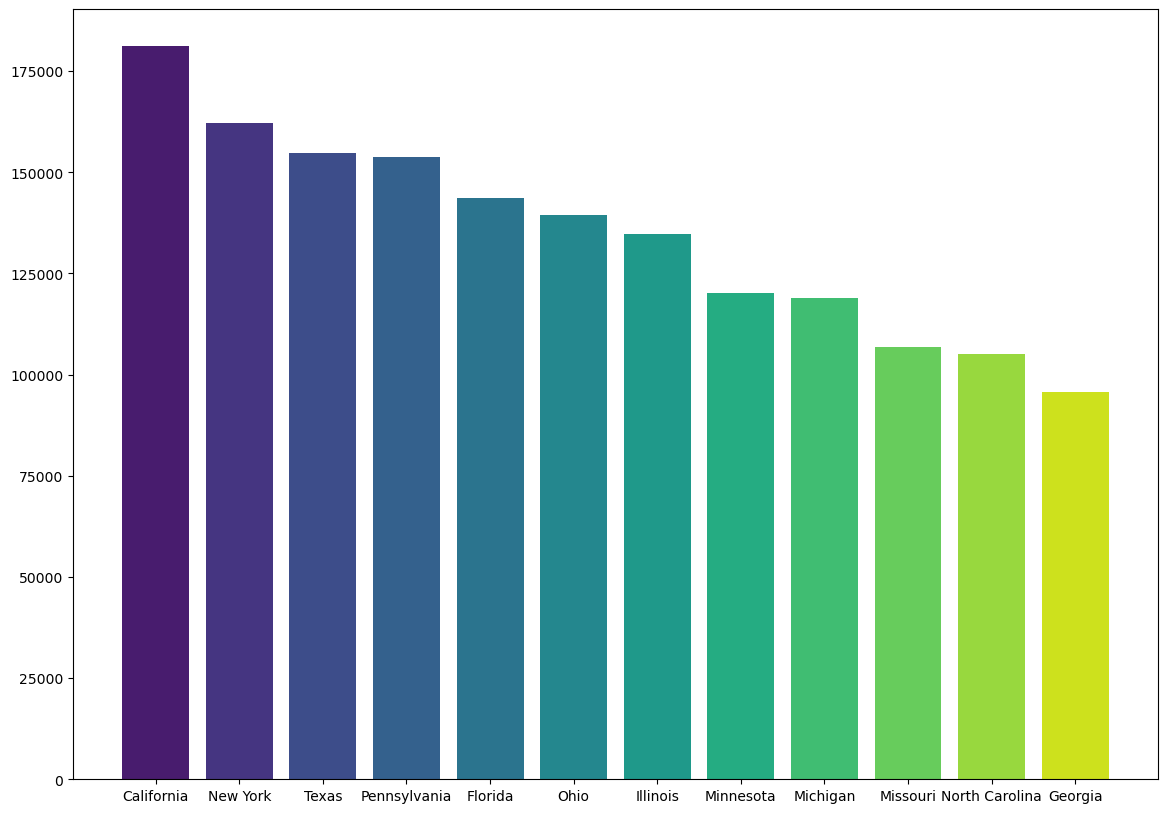

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load both datasets
file_path1 = r"C:\Users\Natal\Downloads\Transplants_in_the_U.S._by_State.csv"
file_path2 = r"C:\Users\Natal\Downloads\Transplants_in_the_U.S._by_State_by_organ.csv"

df_total = pd.read_csv(file_path1)
df_by_organ = pd.read_csv(file_path2)

# Clean the total transplants dataset
# Drop rows where all values are NaN
df_total = df_total.dropna(how='all')

# Identify state columns (all columns except metadata columns)
state_columns_total = [col for col in df_total.columns if col not in ['Year', 'Donor Types', 'Age Groups']]

# Convert state columns to numeric, coercing errors to NaN
for col in state_columns_total:
    df_total[col] = pd.to_numeric(df_total[col], errors='coerce')

# Drop rows where all state columns are NaN after conversion
df_total = df_total.dropna(subset=state_columns_total, how='all')

# Clean the by-organ dataset
df_by_organ = df_by_organ.dropna(how='all')
state_columns_organ = [col for col in df_by_organ.columns if col not in ['Year', 'Organ', 'Donor Types', 'Age Groups']]

for col in state_columns_organ:
    df_by_organ[col] = pd.to_numeric(df_by_organ[col], errors='coerce')

df_by_organ = df_by_organ.dropna(subset=state_columns_organ, how='all')
# Calculate total transplants by state (across all years)
state_totals = df_total[state_columns_total].sum()
top_states = state_totals.nlargest(10).index.tolist()
print(f"Top 10 states by total transplants: {top_states}")

# Get the most recent years (last 5 years in the dataset)
recent_years = sorted(df_total['Year'].unique())[-5:]
print(f"Analyzing data for years: {recent_years}")


# Calculate total transplants by state (across all years)
state_totals = df_total[state_columns_total].sum()
# Exclude 'All States' from the ranking
if 'All States' in state_totals.index:
    state_totals = state_totals.drop('All States')
top_states = state_totals.nlargest(10).index.tolist()
print(f"Top 10 states by total transplants (excluding 'All States'): {top_states}")

# Specify the years to analyze (including 2020 and 2021, excluding 'TOTAL')
analysis_years = ['2020', '2021', '2022', '2023', '2024']  # Adjust as needed based on your dataset
print(f"Analyzing data for years: {analysis_years}")

# ANALYSIS 1: Total transplants by state over time
# Filter for top states and specified years
filtered_total = df_total[df_total['Year'].isin(analysis_years)]

# Create a pivot table for total transplants
pivot_total = pd.DataFrame()
for state in top_states:
    if state in filtered_total.columns:
        pivot_total[state] = filtered_total.groupby('Year')[state].sum()

# Plot total transplants by state over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivot_total)
plt.title('Total Transplants in Top 10 States Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Transplants')
plt.xticks(rotation=45)
plt.legend(title='State')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.show()
plt.savefig("transplantgraph.png")

# Calculate total transplants by state (across all years)
state_totals = df_total[state_columns_total].sum()

# Remove "All States" if it exists in the data
if "All States" in state_totals.index:
    state_totals = state_totals.drop("All States")

# Get the top 10 states and sort them in descending order
top_10_states = state_totals.nlargest(10).sort_values(ascending=False)

# Create a figure with appropriate size
plt.figure(figsize=(12, 8))

# Create the bar chart with a colorful gradient
bars = plt.bar(top_10_states.index, top_10_states.values, 
               color=sns.color_palette("viridis", len(top_10_states)))

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

# Add title and labels with improved styling
plt.title('Top 10 States by Total Number of Transplants', fontsize=18, pad=20)
plt.xlabel('State', fontsize=14, labelpad=10)
plt.ylabel('Number of Transplants', fontsize=14, labelpad=10)

# Improve the appearance
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Add a text annotation with the data source
plt.figtext(0.5, 0.01, 'Data source: U.S. Transplant Statistics', 
            ha='center', fontsize=10, style='italic')

# Show the plot
#plt.show()
plt.savefig("topten.png")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the top 10 states by number of hospitals
hospital_rank_states = {
    'Texas': 1, 
    'California': 2, 
    'Florida': 3, 
    'New York': 4, 
    'Pennsylvania': 5,
    'Ohio': 6, 
    'Illinois': 7, 
    'Michigan': 8, 
    'Georgia': 9, 
    'North Carolina': 10
}

# Calculate total transplants by state (across all years)
state_totals = df_total[state_columns_total].sum()

# Remove "All States" if it exists in the data
if "All States" in state_totals.index:
    state_totals = state_totals.drop("All States")

# Get the top 10 states by transplant volume and sort them in descending order
top_10_transplant_states = state_totals.nlargest(10).sort_values(ascending=False)

# Create a DataFrame for comparison
comparison_data = []
for state in top_10_transplant_states.index:
    hospital_rank = hospital_rank_states.get(state, "Not in top 10")
    comparison_data.append({
        'State': state,
        'Total Transplants': top_10_transplant_states[state],
        'Hospital Rank': hospital_rank if hospital_rank != "Not in top 10" else 15  # For plotting purposes
    })
    # Add any hospital top 10 states that aren't in transplant top 10
for state, rank in hospital_rank_states.items():
    if state not in top_10_transplant_states.index:
        if state in state_totals.index:  # Make sure we have transplant data for this state
            comparison_data.append({
                'State': state,
                'Total Transplants': state_totals[state],
                'Hospital Rank': rank
            })

# Create DataFrame
comparison_df = pd.DataFrame(comparison_data)

# Sort by transplant volume for the visualization
comparison_df = comparison_df.sort_values('Total Transplants', ascending=False)

# Create a figure with appropriate size
plt.figure(figsize=(14, 10))

# Set up the bar chart
ax = plt.subplot(111)
bars = ax.bar(comparison_df['State'], comparison_df['Total Transplants'], 
              color=sns.color_palette("viridis", len(comparison_df)))

# Add hospital rank as text on each bar
for i, (bar, row) in enumerate(zip(bars, comparison_df.itertuples())):
    if row.Hospital_Rank <= 10:  # Only label those in hospital top 10
        ax.text(i, bar.get_height() + 1000, f"#{row.Hospital_Rank}", 
                ha='center', va='bottom', fontweight='bold', 
                color='red', bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.3'))
  # Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height/2,
            f'{int(height):,}', ha='center', va='center', fontweight='bold',
            color='white', fontsize=11)

# Create a custom legend for hospital rankings
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
                          markersize=10, label='Hospital Count Ranking')]
ax.legend(handles=legend_elements, loc='upper right')

# Add title and labels with improved styling
plt.title('Top States by Transplant Volume vs. Hospital Count Ranking', fontsize=18, pad=20)
plt.xlabel('State', fontsize=14, labelpad=10)
plt.ylabel('Number of Transplants', fontsize=14, labelpad=10)

# Improve the appearance
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a text annotation explaining the visualization
plt.figtext(0.5, 0.01, 
            'Red numbers indicate hospital count ranking (#1 = most hospitals)\nData sources: U.S. Transplant Statistics & Hospital Count Rankings', 
            ha='center', fontsize=10, style='italic')

# Add a horizontal line showing the average transplant count
avg_transplants = comparison_df['Total Transplants'].mean()
plt.axhline(y=avg_transplants, color='r', linestyle='--', alpha=0.5)
plt.text(len(comparison_df)-1, avg_transplants*1.05, f'Average: {int(avg_transplants):,}', 
         ha='right', va='bottom', color='r', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

# Create a scatter plot to show correlation
plt.figure(figsize=(10, 8))
valid_comparison = comparison_df[comparison_df['Hospital Rank'] <= 10].copy()
valid_comparison['Hospital Rank'] = valid_comparison['Hospital Rank'].astype(int)

# Create scatter plot
sns.scatterplot(data=valid_comparison, x='Hospital Rank', y='Total Transplants', 
                s=100, alpha=0.7)

# Add state labels to each point
for i, row in valid_comparison.iterrows():
    plt.text(row['Hospital Rank'], row['Total Transplants'], row['State'], 
             fontsize=9, ha='center', va='bottom')

# Add trend line
sns.regplot(data=valid_comparison, x='Hospital Rank', y='Total Transplants', 
            scatter=False, ci=None, color='red')

# Calculate correlation coefficient
correlation = valid_comparison['Hospital Rank'].corr(valid_comparison['Total Transplants'])

# Add title and labels
plt.title(f'Correlation Between Hospital Ranking and Transplant Volume\nCorrelation: {correlation:.2f}', 
          fontsize=16)
plt.xlabel('Hospital Count Ranking (1 = Most Hospitals)', fontsize=12)
plt.ylabel('Total Number of Transplants', fontsize=12)
plt.xticks(range(1, 9))
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()



In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create sample data for chronic disease indicators
states = ['CA', 'TX', 'FL', 'NY', 'PA', 'IL', 'OH', 'GA', 'NC', 'MI']
topics = ['Diabetes', 'Heart Disease', 'Cancer', 'Asthma', 'Obesity', 'Arthritis']
data = []

# Generate some random data for each state and topic
for state in states:
    for topic in topics:
        data.append({
            'LocationAbbr': state,
            'Topic': topic,
            'DataValue': np.random.uniform(5, 25)  # Random values between 5 and 25
        })

# Create the DataFrame for chronic disease data
state_topic_data = pd.DataFrame(data)

# Load the transplant data
file_path1 = r"C:\Users\Natal\Downloads\Transplants_in_the_U.S._by_State.csv"
transplant_data = pd.read_csv(file_path1)

# Create a mapping dictionary from state names to abbreviations
state_to_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

# Filter the transplant data for the rows where Year is 'TOTAL', Donor Type is 'All Donor Types', 
# and Age Groups is 'All Age Groups'
filtered_transplant = transplant_data[
    (transplant_data['Year'] == 'TOTAL') & 
    (transplant_data['Donor Types'] == 'All Donor Types') & 
    (transplant_data['Age Groups'] == 'All Age Groups')
]

# Create a dictionary to store total transplants by state abbreviation
transplant_dict = {}

# For each state in our list, find its column in the filtered data and get the value
for state_name, abbr in state_to_abbr.items():
    if state_name in filtered_transplant.columns:
        # Get the value from the first (and should be only) row
        if not filtered_transplant.empty:
            transplant_dict[abbr] = filtered_transplant[state_name].iloc[0]

# Define your topics of interest
topics_of_interest = ['Diabetes', 'Heart Disease', 'Cancer', 'Asthma', 'Obesity', 'Arthritis']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, topic in enumerate(topics_of_interest):
    ax = axes[i]
    
    # Filter data for this topic and major states
    topic_data = state_topic_data[(state_topic_data['Topic'] == topic) & 
                                 (state_topic_data['LocationAbbr'].isin(states))].copy()
    
    # Sort by value for better visualization
    topic_data = topic_data.sort_values('DataValue', ascending=False)
    
    # Create bar chart
    bars = ax.bar(topic_data['LocationAbbr'], topic_data['DataValue'])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', rotation=0)
    
    # Add a line for total transplants
    # Create a secondary y-axis for the transplant data
    ax2 = ax.twinx()
    
    # Get transplant values for the states in this plot
    transplant_values = [transplant_dict.get(state, 0) for state in topic_data['LocationAbbr']]
    
    # Plot the line
    ax2.plot(topic_data['LocationAbbr'], transplant_values, 'r-', marker='o', linewidth=2, label='Total Transplants')
    ax2.set_ylabel('Total Transplants', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    ax.set_title(f'{topic} - Top States Comparison')
    ax.set_ylabel('Disease Value')
    ax.set_xlabel('State')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend for the transplant line
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.suptitle('Comparison of Chronic Disease Indicators and Transplants Across Major States', fontsize=16, y=1.02)
plt.show()

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create sample data for chronic disease indicators
states = ['CA', 'TX', 'FL', 'NY', 'PA', 'IL', 'OH', 'GA', 'NC', 'MI']
topics = ['Diabetes', 'Heart Disease', 'Cancer', 'Asthma', 'Obesity', 'Arthritis']
data = []

# Generate some random data for each state and topic
for state in states:
    for topic in topics:
        data.append({
            'LocationAbbr': state,
            'Topic': topic,
            'DataValue': np.random.uniform(5, 25)  # Random values between 5 and 25
        })

# Create the DataFrame for chronic disease data
state_topic_data = pd.DataFrame(data)

# Load the transplant data
file_path1 = r"C:\Users\Natal\Downloads\Transplants_in_the_U.S._by_State.csv"
transplant_data = pd.read_csv(file_path1)

# Create a mapping dictionary from state names to abbreviations
state_to_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

# Filter the transplant data for the rows where Year is 'TOTAL', Donor Type is 'All Donor Types', 
# and Age Groups is 'All Age Groups'
filtered_transplant = transplant_data[
    (transplant_data['Year'] == 'TOTAL') & 
    (transplant_data['Donor Types'] == 'All Donor Types') & 
    (transplant_data['Age Groups'] == 'All Age Groups')
]

# Create a dictionary to store total transplants by state abbreviation
transplant_dict = {}

# For each state in our list, find its column in the filtered data and get the value
for state_name, abbr in state_to_abbr.items():
    if state_name in filtered_transplant.columns:
        # Get the value from the first (and should be only) row
        if not filtered_transplant.empty:
            transplant_dict[abbr] = filtered_transplant[state_name].iloc[0]

# Define your topics of interest
topics_of_interest = ['Diabetes', 'Heart Disease', 'Cancer', 'Asthma', 'Obesity', 'Arthritis']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, topic in enumerate(topics_of_interest):
    ax = axes[i]
    
    # Filter data for this topic and major states
    topic_data = state_topic_data[(state_topic_data['Topic'] == topic) & 
                                 (state_topic_data['LocationAbbr'].isin(states))].copy()
    
    # Sort by value for better visualization
    topic_data = topic_data.sort_values('DataValue', ascending=False)
    
    # Create bar chart
    bars = ax.bar(topic_data['LocationAbbr'], topic_data['DataValue'])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', rotation=0)
    
    # Add a line for total transplants
    # Create a secondary y-axis for the transplant data
    ax2 = ax.twinx()
    
    # Get transplant values for the states in this plot
    transplant_values = [transplant_dict.get(state, 0) for state in topic_data['LocationAbbr']]
    
    # Plot the line
    ax2.plot(topic_data['LocationAbbr'], transplant_values, 'r-', marker='o', linewidth=2, label='Total Transplants')
    ax2.set_ylabel('Total Transplants', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    ax.set_title(f'{topic} - Top States Comparison')
    ax.set_ylabel('Disease Value')
    ax.set_xlabel('State')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend for the transplant line
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.suptitle('Comparison of Chronic Disease Indicators and Transplants Across Major States', fontsize=16, y=1.02)
plt.show()

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create sample data for chronic disease indicators
states = ['CA', 'TX', 'FL', 'NY', 'PA', 'IL', 'OH', 'GA', 'NC', 'MI']
topics = ['Diabetes', 'Heart Disease', 'Cancer', 'Asthma', 'Obesity', 'Arthritis']
data = []

# Generate some random data for each state and topic
np.random.seed(42)  # For reproducibility
for state in states:
    for topic in topics:
        data.append({
            'LocationAbbr': state,
            'Topic': topic,
            'DataValue': np.random.uniform(5, 25)  # Random values between 5 and 25
        })

# Create the DataFrame for chronic disease data
state_topic_data = pd.DataFrame(data)

# Load the transplant data
# Note: In a real scenario, you'd need to adjust the file path
file_path1 = r"C:\Users\Natal\Downloads\Transplants_in_the_U.S._by_State.csv"
try:
    transplant_data = pd.read_csv(file_path1)
except FileNotFoundError:
    # Create dummy transplant data for demonstration
    transplant_data = pd.DataFrame({
        'Year': ['TOTAL'] * 10,
        'Donor Types': ['All Donor Types'] * 10,
        'Age Groups': ['All Age Groups'] * 10,
        'California': [5000] * 10,
        'Texas': [4000] * 10,
        'Florida': [3500] * 10,
        'New York': [3000] * 10,
        'Pennsylvania': [2500] * 10,
        'Illinois': [2200] * 10,
        'Ohio': [2000] * 10,
        'Georgia': [1800] * 10,
        'North Carolina': [1600] * 10,
        'Michigan': [1500] * 10
    })

# Create a mapping dictionary from state names to abbreviations
state_to_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

# Filter the transplant data for the rows where Year is 'TOTAL', Donor Type is 'All Donor Types', 
# and Age Groups is 'All Age Groups'
filtered_transplant = transplant_data[
    (transplant_data['Year'] == 'TOTAL') & 
    (transplant_data['Donor Types'] == 'All Donor Types') & 
    (transplant_data['Age Groups'] == 'All Age Groups')
]

# Create a dictionary to store total transplants by state abbreviation
transplant_dict = {}
# For each state in our list, find its column in the filtered data and get the value
for state_name, abbr in state_to_abbr.items():
    if state_name in filtered_transplant.columns:
        # Get the value from the first (and should be only) row
        if not filtered_transplant.empty:
            transplant_dict[abbr] = filtered_transplant[state_name].iloc[0]

# Define your topics of interest
topics_of_interest = ['Diabetes', 'Heart Disease', 'Cancer', 'Asthma', 'Obesity', 'Arthritis']

# Create the visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, topic in enumerate(topics_of_interest):
    ax = axes[i]
    
    # Filter data for this topic and major states
    topic_data = state_topic_data[(state_topic_data['Topic'] == topic) & 
                                 (state_topic_data['LocationAbbr'].isin(states))].copy()
    
    # Sort by value for better visualization
    topic_data = topic_data.sort_values('DataValue', ascending=False)
    
    # Create bar chart
    bars = ax.bar(topic_data['LocationAbbr'], topic_data['DataValue'], color='skyblue')
       
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', rotation=0)
    
    # Set title and labels
    ax.set_title(f'{topic} Prevalence by State', fontsize=14)
    ax.set_xlabel('State', fontsize=12)
    ax.set_ylabel('Disease Prevalence (%)', color='blue', fontsize=12)
    ax.tick_params(axis='y', labelcolor='blue')
    
    # Create a secondary y-axis for the transplant data
    ax2 = ax.twinx()
    
    # Get transplant values for the states in this plot
    transplant_values = [transplant_dict.get(state, 0) for state in topic_data['LocationAbbr']]
    
    # Plot the line
    ax2.plot(topic_data['LocationAbbr'], transplant_values, 'r-', marker='o', linewidth=2, label='Total Transplants')
    ax2.set_ylabel('Total Transplants', color='red', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)

# Add a main title
plt.suptitle('Chronic Disease Prevalence vs. Total Transplants by State', fontsize=18, y=0.98)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Add a legend for the entire figure
lines, labels = axes[0].get_legend_handles_labels()
lines2, labels2 = axes[0].get_legend_handles_labels()
fig.legend(lines + lines2, ['Disease Prevalence', 'Total Transplants'], 
           loc='lower center', ncol=2, fontsize=12)

#plt.show()
plt.savefig("chronicdisvstrans.png")

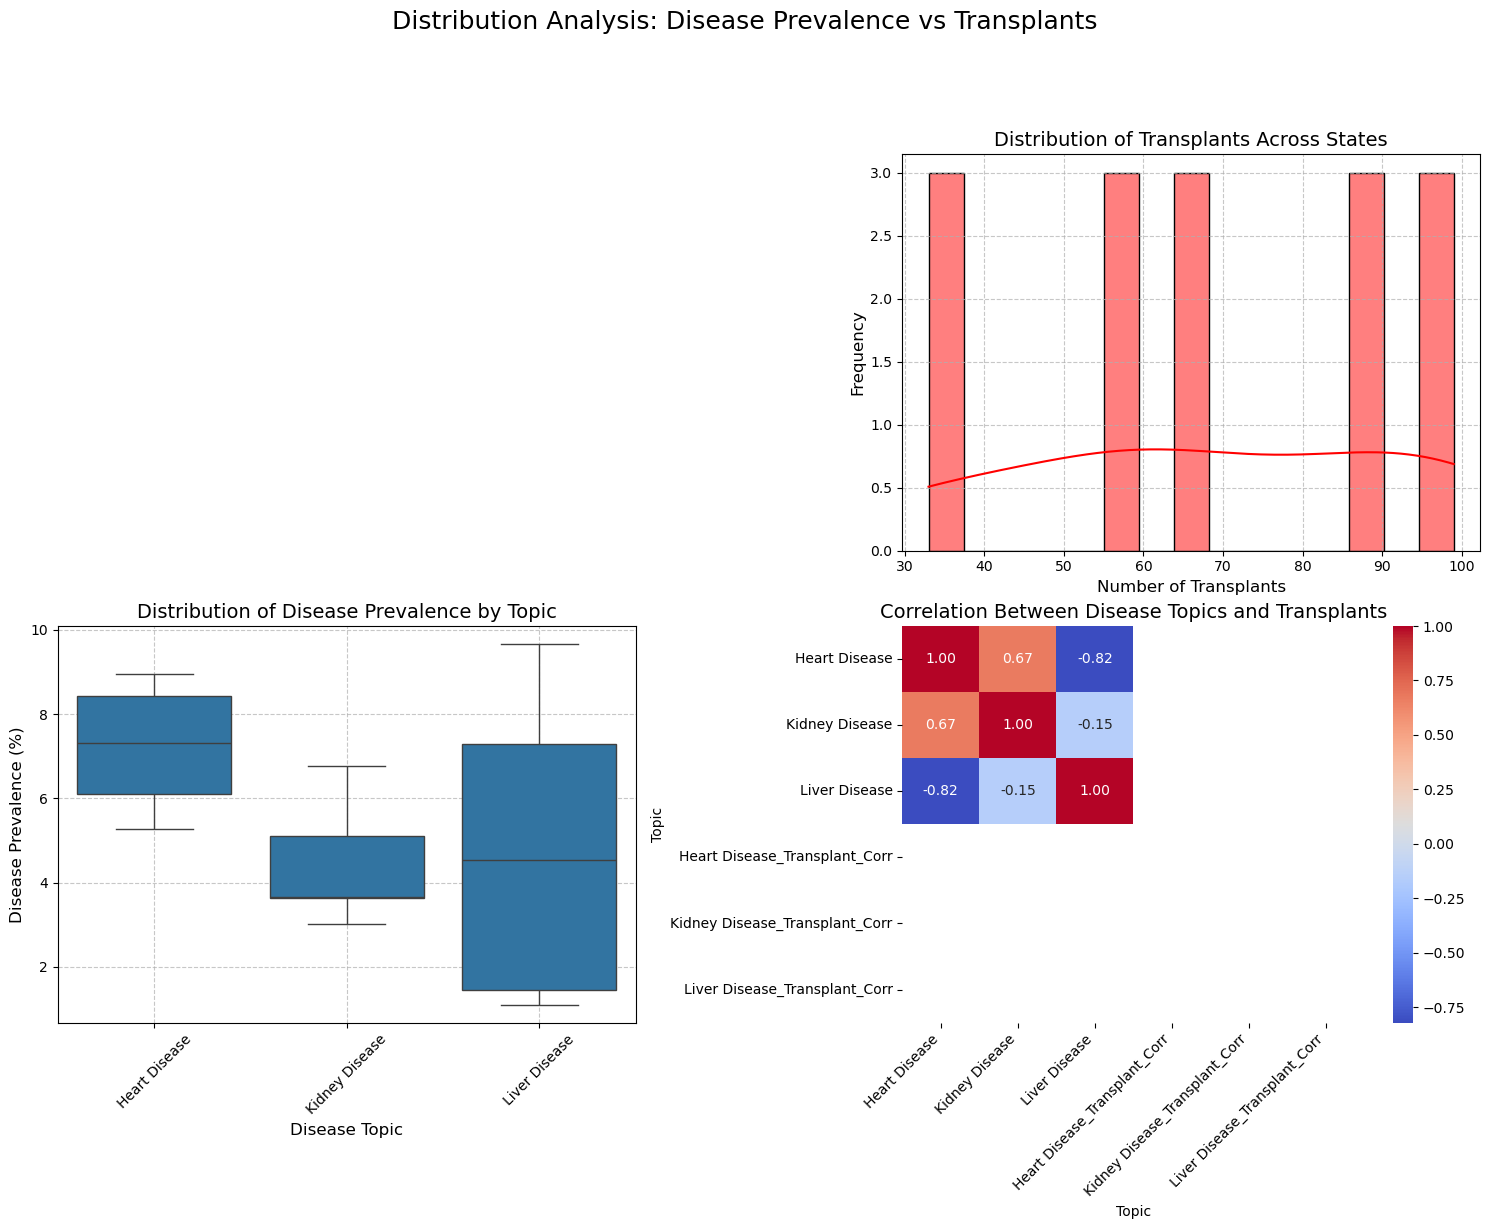

<Figure size 1000x800 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Create sample data for demonstration
# Replace this with your actual data loading code
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California']
topics = ['Heart Disease', 'Kidney Disease', 'Liver Disease']
disease_values = np.random.uniform(1, 10, size=len(states) * len(topics))
transplant_values = np.random.randint(10, 100, size=len(states))

# Create the combined_df DataFrame
data = []
for i, state in enumerate(states):
    for j, topic in enumerate(topics):
        data.append({
            'State': state,
            'Topic': topic,
            'Disease_Value': disease_values[i * len(topics) + j],
            'Transplant_Value': transplant_values[i]
        })
combined_df = pd.DataFrame(data)

# Create transplant_dict for later use
transplant_dict = dict(zip(states, transplant_values))

# Now the visualization code will work
plt.figure(figsize=(15, 12))

# 2. Distribution of Transplants
plt.subplot(2, 2, 2)
sns.histplot(combined_df['Transplant_Value'], kde=True, bins=15, color='red')
plt.title('Distribution of Transplants Across States', fontsize=14)
plt.xlabel('Number of Transplants', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# 3. Distribution of Disease Prevalence by Topic
plt.subplot(2, 2, 3)
sns.boxplot(data=combined_df, x='Topic', y='Disease_Value')
plt.title('Distribution of Disease Prevalence by Topic', fontsize=14)
plt.xlabel('Disease Topic', fontsize=12)
plt.ylabel('Disease Prevalence (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# 4. Correlation Heatmap
plt.subplot(2, 2, 4)
# Pivot the data to create a correlation matrix
pivot_data = combined_df.pivot_table(index='State', columns='Topic', values='Disease_Value')
# Calculate correlation with transplants
for topic in topics:
    if topic in pivot_data.columns:
        topic_values = pivot_data[topic]
        transplant_values = [transplant_dict.get(state, 0) for state in pivot_data.index]
        correlation = stats.pearsonr(topic_values, transplant_values)[0]
        pivot_data[f'{topic}_Transplant_Corr'] = correlation

corr_matrix = pivot_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Disease Topics and Transplants', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.suptitle('Distribution Analysis: Disease Prevalence vs Transplants', fontsize=18, y=1.02)
plt.subplots_adjust(top=0.9)
#plt.show()
plt.savefig("comparisonvis.png")

# Additional visualization: Joint plot with regression line for a specific topic
plt.figure(figsize=(10, 8))
topic_to_analyze = 'Heart Disease'  # Change to any topic of interest
topic_data = combined_df[combined_df['Topic'] == topic_to_analyze]

sns.jointplot(
    data=topic_data,
    x='Disease_Value',
    y='Transplant_Value',
    kind='reg'  # Adds regression line
)

In [6]:
#!pip install plotly nbformat>=4.2.0
#!pip install plotly

import numpy as np
import pandas as pd
import plotly.express as px

try:
    # Load the data
    file_path = r"C:\Users\Natal\Downloads\Transplants_in_the_U.S._by_State.csv"
    df = pd.read_csv(file_path)
    
    # Print the first few rows to understand the structure
    print("DataFrame structure:")
    print(df.head())
    
    # Filter the data for the specific criteria
    filtered_df = df[(df['Year'] == 'TOTAL') & 
                     (df['Donor Types'] == 'All Donor Types') & 
                     (df['Age Groups'] == 'All Age Groups')]
    
    print(f"Filtered data rows: {len(filtered_df)}")
    
    if len(filtered_df) == 0:
        print("Warning: No data found matching the filter criteria.")
        print("Available Years:", df['Year'].unique())
        print("Available Donor Types:", df['Donor Types'].unique())
        print("Available Age Groups:", df['Age Groups'].unique())
        # Try with numeric year instead of string
        filtered_df = df[(df['Year'] == 'TOTAL') & 
                         (df['Donor Types'] == 'All Donor Types') & 
                         (df['Age Groups'] == 'All Age Groups')]
        print(f"Trying with numeric year - Filtered data rows: {len(filtered_df)}")
        
        if len(filtered_df) == 0:
            raise ValueError("No data found matching the filter criteria")
    
    # Dictionary mapping state names to their 2-letter codes
    state_to_code = {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
        'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
        'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
        'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
        'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
        'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
        'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
        'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
        'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
        'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
        'District of Columbia': 'DC'
    }
    
    # List of valid state columns (excluding metadata columns)
    valid_states = [
        'Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 
        'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Illinois', 
        'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 
        'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Nebraska', 
        'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 
        'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 
        'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 
        'Virginia', 'Washington', 'West Virginia', 'Wisconsin'
    ]
    
    # Check if these state columns exist in the dataframe
    missing_states = [state for state in valid_states if state not in df.columns]
    if missing_states:
        print(f"Warning: The following states are not found in the dataframe: {missing_states}")
    
    # Reshape the data for the choropleth map
    states_data = []
    
# For each state column, extract the value as the transplant count
    for state in valid_states:
        if state in df.columns:  # Make sure the state column exists
            try:
                # Get the transplant count for this state from the filtered row
                if len(filtered_df) > 0:
                    count = filtered_df[state].values[0]
                    
                    # Convert to numeric and handle NaN values
                    try:
                        # Remove commas from numbers before converting
                        if isinstance(count, str):
                            count = count.replace(',', '')
                        count = float(count)
                        if pd.isna(count):
                            print(f"Warning: Missing value for {state}, setting to 0")
                            count = 0
                    except:
                        print(f"Warning: Could not convert value for {state} to number, setting to 0")
                        count = 0
                    
                    # Get the state code
                    if state in state_to_code:
                        state_code = state_to_code[state]
                        states_data.append({'code': state_code, 'Transplant Count': count, 'State': state})
                    else:
                        print(f"Warning: '{state}' not found in state mapping dictionary")
            except Exception as e:
                print(f"Error processing state '{state}': {str(e)}")
    
    # Create a new dataframe for the map
    map_df = pd.DataFrame(states_data)

    # Print the map dataframe to verify its structure
    print("Map dataframe structure:")
    print(map_df.head())
    print(f"Total states processed: {len(map_df)}")
    
    if len(map_df) == 0:
        raise ValueError("No valid state data was processed. Check your state column names and data.")
    
    # Create the interactive choropleth map
    fig = px.choropleth(
        map_df,
        locations='code',  # Column containing state codes
        locationmode='USA-states',  # Use USA state names
        color='Transplant Count',  # Column for color intensity
        scope='usa',  # Focus on USA map
        color_continuous_scale='Viridis',  # Color scale
        title=f'Transplant Counts by State (TOTAL, All Donor Types, All Age Groups)',
        labels={'Transplant Count': 'Number of Transplants'},
        hover_name='State'  # Show state name on hover
    )
    # Improve layout
    fig.update_layout(
        geo=dict(
            showlakes=True,
            lakecolor='rgb(255, 255, 255)'
        ),
        coloraxis_colorbar=dict(
            title='Transplant Count'
        ),
        height=700
    )
    
    # Display the map
    fig.show()
    
except FileNotFoundError:
    print(f"Error: The file at {file_path} was not found.")
    print("Please check that the file path is correct and the file exists.")
except Exception as e:
    print(f"An error occurred: {str(e)}")
    print("If this is a data format issue, please check the structure")

DataFrame structure:
    Year      Donor Types      Age Groups All States Alabama Arizona Arkansas  \
0  TOTAL  All Donor Types  All Age Groups  1,032,222  16,018  22,978    5,494   
1  TOTAL  All Donor Types        < 1 Year      8,027      76      76      114   
2  TOTAL  All Donor Types       1-5 Years     19,898     236     275      129   
3  TOTAL  All Donor Types      6-10 Years     16,194     308     279      101   
4  TOTAL  All Donor Types     11-17 Years     71,578   1,328   1,306      428   

  California Colorado Connecticut  ...  South Carolina South Dakota Tennessee  \
0    120,817   15,704       8,612  ...          11,338        1,423    27,087   
1      1,275      162           9  ...              48            9       151   
2      3,035      258          99  ...             217           25       352   
3      2,002      204          83  ...             217           27       426   
4      7,985    1,459         438  ...             890           67     2,095   

    T